---
<center> <h3>College of Engineering Guindy</h3> </center>
<center> <h3>CS7591 Python Programming</h3> </center>
<center> <h3>Mini Project : Novel Corona Virus 2019 - Analysis and Forecasting</h3> </center>
<br>
<center> <h4>Name: Neelesh .K</h4> </center>
<center> <h4>Roll No: 2017108025</h4> </center>
<center> <h4>Semester: VI</h4> </center>
<center> <h4>Department: Industrial Engineering</h4> </center>

---

## Novel Corona Virus 2019

2019 Novel Coronavirus (2019-nCoV) is a virus (more specifically, a coronavirus) identified as the cause of an outbreak of respiratory illness first detected in Wuhan, China. Early on, many of the patients in the outbreak in Wuhan, China reportedly had some link to a large seafood and animal market, suggesting animal-to-person spread. However, a growing number of patients reportedly have not had exposure to animal markets, indicating person-to-person spread is occurring. At this time, it’s unclear how easily or sustainably this virus is spreading between people - CDC

This dataset has daily level information on the number of affected cases, deaths and recovery from 2019 novel coronavirus. Please note that this is a time series data and so the number of cases on any given day is the cumulative number.

The data is available from 22 Jan, 2020.

### Column Description

1. Sno - Serial number
2. ObservationDate - Date of the observation in MM/DD/YYYY
3. Province/State - Province or state of the observation (Could be empty when missing)
4. Country/Region - Country of observation
5. Last Update - Time in UTC at which the row is updated for the given province or country. (Not standardised and so please clean before using it)
6. Confirmed - Cumulative number of confirmed cases till that date
7. Deaths - Cumulative number of of deaths till that date
8. Recovered - Cumulative number of recovered cases till that date

### Importing required Python Packages and Libraries

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

# hide warnings
import warnings
warnings.filterwarnings("ignore")

sns.set(style="darkgrid")


### Loading the Datasets

In [2]:
#importing datasets
covid = pd.read_csv("covid_19_data.csv")
confirmed = pd.read_csv('time_series_covid_19_confirmed.csv')
deaths = pd.read_csv('time_series_covid_19_deaths.csv')
recovered = pd.read_csv('time_series_covid_19_recovered.csv')
features = pd.read_csv("COVID19_line_list_data.csv")

### Data cleaning

In [3]:
data = covid
# replacing Mainland china with just China
data['Country/Region'] = data['Country/Region'].replace('Mainland China', 'China')

# making observationDate as datetime and setting frequency
data['ObservationDate']= pd.to_datetime(data['ObservationDate'])
data['ObservationDate'].freq='D'

data.drop(['SNo'],axis = 1,inplace= True)

# Changing Datatypes of 'Confirmed', 'Deaths' and 'Recovered'
data[['Confirmed','Deaths','Recovered']]=data[['Confirmed','Deaths','Recovered']].astype(int)

In [4]:
covid

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,China,1/22/2020 17:00,1,0,0
1,2020-01-22,Beijing,China,1/22/2020 17:00,14,0,0
2,2020-01-22,Chongqing,China,1/22/2020 17:00,6,0,0
3,2020-01-22,Fujian,China,1/22/2020 17:00,1,0,0
4,2020-01-22,Gansu,China,1/22/2020 17:00,0,0,0
...,...,...,...,...,...,...,...
15764,2020-04-16,Wyoming,US,2020-04-16 23:38:19,296,2,0
15765,2020-04-16,Xinjiang,China,2020-04-16 23:38:19,76,3,73
15766,2020-04-16,Yukon,Canada,2020-04-16 23:38:19,8,0,0
15767,2020-04-16,Yunnan,China,2020-04-16 23:38:19,184,2,176


In [5]:
datewise = covid.groupby('ObservationDate').sum()
datewise.index.freq = 'D'

In [6]:
covid["ObservationDate"]=pd.to_datetime(covid["ObservationDate"])

In [7]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15769 entries, 0 to 15768
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ObservationDate  15769 non-null  datetime64[ns]
 1   Province/State   7940 non-null   object        
 2   Country/Region   15769 non-null  object        
 3   Last Update      15769 non-null  object        
 4   Confirmed        15769 non-null  int32         
 5   Deaths           15769 non-null  int32         
 6   Recovered        15769 non-null  int32         
dtypes: datetime64[ns](1), int32(3), object(3)
memory usage: 677.7+ KB


In [8]:
print("Size/Shape of the dataset: ",covid.shape)
print("Checking for null values:\n",covid.isnull().sum())
print("Checking Data-type of each column:\n",covid.dtypes)

Size/Shape of the dataset:  (15769, 7)
Checking for null values:
 ObservationDate       0
Province/State     7829
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64
Checking Data-type of each column:
 ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update                object
Confirmed                   int32
Deaths                      int32
Recovered                   int32
dtype: object


### Exploratory Data Analysis

In [9]:
#Earliest cases
covid.head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,China,1/22/2020 17:00,1,0,0
1,2020-01-22,Beijing,China,1/22/2020 17:00,14,0,0
2,2020-01-22,Chongqing,China,1/22/2020 17:00,6,0,0
3,2020-01-22,Fujian,China,1/22/2020 17:00,1,0,0
4,2020-01-22,Gansu,China,1/22/2020 17:00,0,0,0


In [10]:
#Latest cases
covid.tail()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
15764,2020-04-16,Wyoming,US,2020-04-16 23:38:19,296,2,0
15765,2020-04-16,Xinjiang,China,2020-04-16 23:38:19,76,3,73
15766,2020-04-16,Yukon,Canada,2020-04-16 23:38:19,8,0,0
15767,2020-04-16,Yunnan,China,2020-04-16 23:38:19,184,2,176
15768,2020-04-16,Zhejiang,China,2020-04-16 23:38:19,1268,1,1244


In [11]:
#Coronavirus Worldwide Statistics
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Coronavirus Worldwide Statistics", "Numbers"]
x.add_row(["Confirmed cases", '{:,}'.format(int(datewise['Confirmed'].iloc[-1]))])
x.add_row(["Recovered", '{:,}'.format(int(datewise['Recovered'].iloc[-1]))])
x.add_row(["Deaths", '{:,}'.format(int(datewise['Deaths'].iloc[-1]))])
x.add_row(["Active Cases", '{:,}'.format(int(datewise["Confirmed"].iloc[-1]-datewise["Recovered"].iloc[-1]-datewise["Deaths"].iloc[-1]))])
x.add_row(["Closed Cases", '{:,}'.format(int(datewise["Recovered"].iloc[-1]+datewise["Deaths"].iloc[-1]))])
print(x)


+----------------------------------+-----------+
| Coronavirus Worldwide Statistics |  Numbers  |
+----------------------------------+-----------+
|         Confirmed cases          | 2,152,647 |
|            Recovered             |  542,107  |
|              Deaths              |  143,801  |
|           Active Cases           | 1,466,739 |
|           Closed Cases           |  685,908  |
+----------------------------------+-----------+


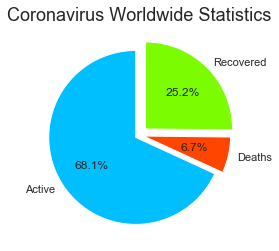

In [12]:
plt.title("Coronavirus Worldwide Statistics", fontsize = 18)
colors = ['deepskyblue','orangered','lawngreen']
explode =(0.05,0.05,0.1) 
labels = ['Active', 'Deaths', 'Recovered']
plt.pie(pd.DataFrame({'Confirmed cases': [1466739, 143801, 542107]}), explode = explode,labels= labels, colors=colors, startangle=90, autopct='%.1f%%') 
plt.show()

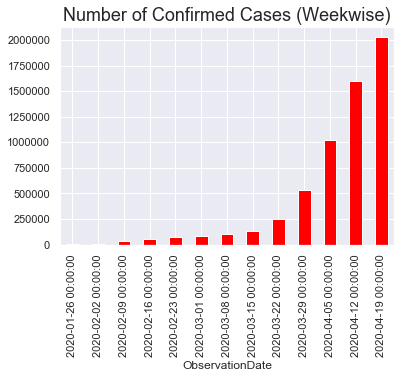

In [13]:
plt.title("Number of Confirmed Cases (Weekwise)", fontsize = 18)
datewise['Confirmed'].resample('W').mean().plot.bar(color='red',)

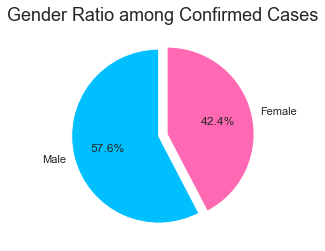

In [14]:
gender = features['gender'].dropna()
gender = pd.DataFrame(data = gender)

#gender['gender'].value_counts()


plt.title("Gender Ratio among Confirmed Cases", fontsize = 18)
colors = ['deepskyblue','hotpink']
explode =(0.05,0.05) 
labels = ['Male', 'Female']
plt.pie(pd.DataFrame({'Confirmed cases': [520, 382]}), explode = explode,labels= labels, colors=colors, startangle=90, autopct='%.1f%%') 
plt.show()

In [15]:
age = features['age'].value_counts()
age = pd.DataFrame(data = age)
age.sort_values('age', ascending= False)
age = age.rename(columns={'age': 'count'})
age['age'] = age.index
age.head()

,count,age
55.0,72,55.0
65.0,52,65.0
45.0,39,45.0
75.0,37,75.0
35.0,36,35.0


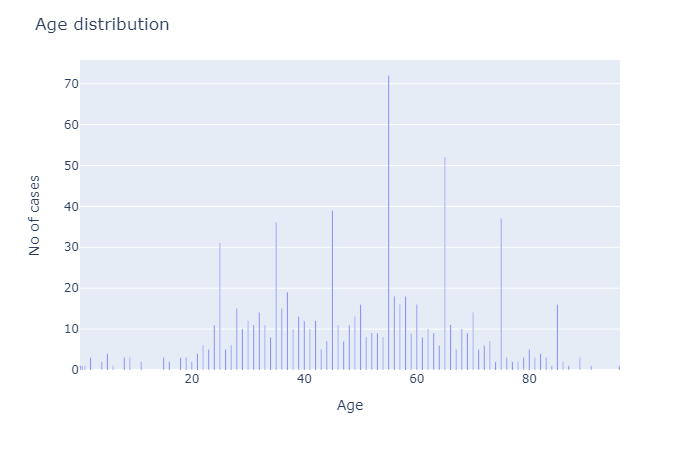

In [16]:
fig = px.bar(age, x="age", y='count')
fig.update_layout(
    title="Age distribution",
    xaxis_title="Age",
    yaxis_title="No of cases"
)
#fig.show()
from IPython.display import Image
Image("images/newplot2.png")

#### Active cases  = Confirmed - (Recovered + Death)
#### Mortality rate = (Number of Death Cases / Number of Confirmed Cases) x 100
#### Recovery Rate= (Number of Recoverd Cases / Number of Confirmed Cases) x 100
#### Mortality rate increment is pretty significant That's a conclusive evidence why number of Closed Cases and Death Cases are more.
#### Recovery Rate has started to pick up again which is a good sign, another supportive reason to why number of Closed Cases are increasing

In [17]:
#Calculating the Mortality Rate and Recovery Rate
datewise["Mortality Rate"]=(datewise["Deaths"]/datewise["Confirmed"])*100
datewise["Recovery Rate"]=(datewise["Recovered"]/datewise["Confirmed"])*100
datewise["Active"]=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"]
datewise["Closed"]=datewise["Recovered"]+datewise["Deaths"]

datewise.head()

,Confirmed,Deaths,Recovered,Mortality Rate,Recovery Rate,Active,Closed
ObservationDate,,,,,,,
2020-01-22,555,17,28,3.063063,5.045045,510,45
2020-01-23,653,18,30,2.756508,4.594181,605,48
2020-01-24,941,26,36,2.763018,3.825717,879,62
2020-01-25,1438,42,39,2.920723,2.712100,1357,81
2020-01-26,2118,56,52,2.644004,2.455146,2010,108


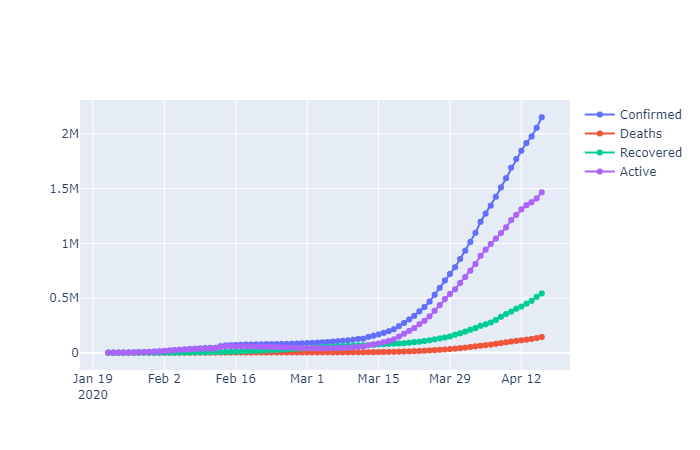

In [18]:
worldwide = datewise.groupby('ObservationDate').sum().reset_index()
worldwide
fig = go.Figure()
fig.add_trace(go.Scatter(x=worldwide['ObservationDate'], y=worldwide['Confirmed'],
                    mode='lines+markers',
                    name='Confirmed'))
fig.add_trace(go.Scatter(x=worldwide['ObservationDate'], y=worldwide['Deaths'],
                    mode='lines+markers',
                    name='Deaths'))
fig.add_trace(go.Scatter(x=worldwide['ObservationDate'], y=worldwide['Recovered'],
                    mode='lines+markers',
                    name='Recovered'))

fig.add_trace(go.Scatter(x=worldwide['ObservationDate'], y=worldwide['Active'],
                    mode='lines+markers',
                    name='Active'))


#fig.show() Converting the plot into a static image for the purpose of uploading in Github
from IPython.display import Image
Image("images/newplot1.png", width=800, height=200)

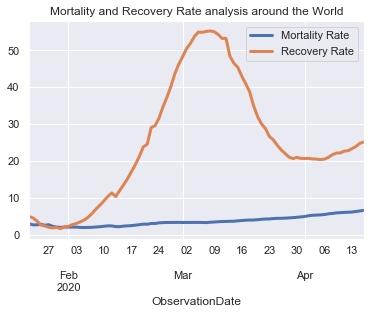

In [19]:
datewise[['Mortality Rate','Recovery Rate']].plot(title="Mortality and Recovery Rate analysis around the World",linewidth=3)

#### Mortality and Recovery Rate analysis around the World

Average Mortality Rate 3.7110381968410455
Median Mortality Rate 3.4176499600527657
Average Recovery Rate 24.88947985854702
Median Recovery Rate 22.209754626182747


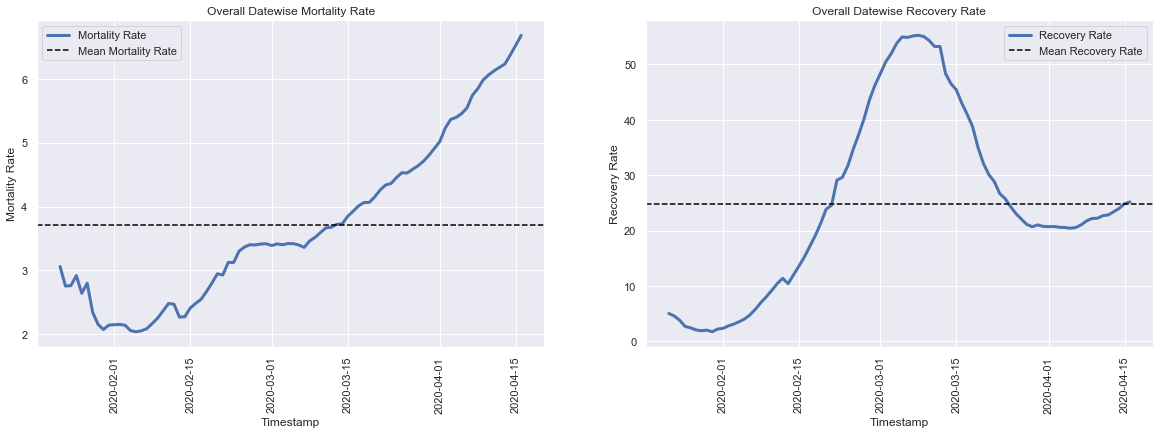

In [20]:

#Plotting Mortality and Recovery Rate 
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,6))
ax1.plot(datewise["Mortality Rate"],label='Mortality Rate',linewidth=3)
ax1.axhline(datewise["Mortality Rate"].mean(),linestyle='--',color='black',label="Mean Mortality Rate")
ax1.set_ylabel("Mortality Rate")
ax1.set_xlabel("Timestamp")
ax1.set_title("Overall Datewise Mortality Rate")
ax1.legend()
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
ax2.plot(datewise["Recovery Rate"],label="Recovery Rate",linewidth=3)
ax2.axhline(datewise["Recovery Rate"].mean(),linestyle='--',color='black',label="Mean Recovery Rate")
ax2.set_ylabel("Recovery Rate")
ax2.set_xlabel("Timestamp")
ax2.set_title("Overall Datewise Recovery Rate")
ax2.legend()
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)
    
print("Average Mortality Rate",datewise["Mortality Rate"].mean())
print("Median Mortality Rate",datewise["Mortality Rate"].median())
print("Average Recovery Rate",datewise["Recovery Rate"].mean())
print("Median Recovery Rate",datewise["Recovery Rate"].median())

Average increase in number of Confirmed Cases every day:  25024.0
Average increase in number of Recovered Cases every day:  6303.0
Average increase in number of Deaths Cases every day:  1672.0


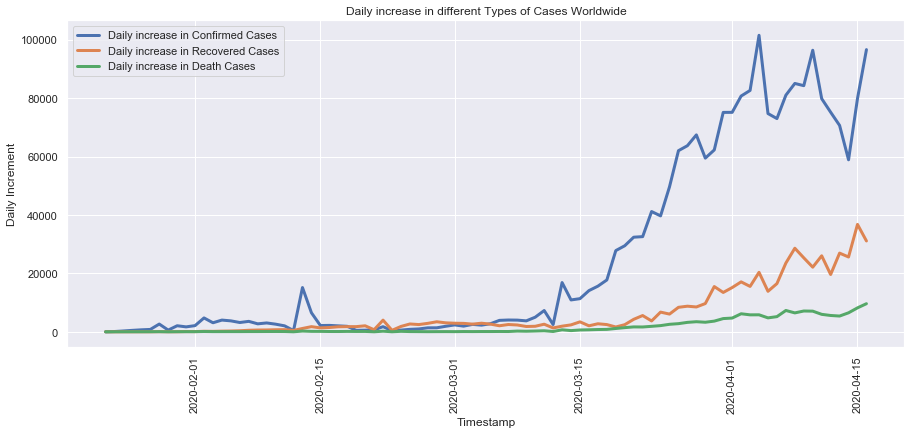

In [21]:
plt.figure(figsize=(15,6))
plt.plot(datewise["Confirmed"].diff().fillna(0),label="Daily increase in Confirmed Cases",linewidth=3)
plt.plot(datewise["Recovered"].diff().fillna(0),label="Daily increase in Recovered Cases",linewidth=3)
plt.plot(datewise["Deaths"].diff().fillna(0),label="Daily increase in Death Cases",linewidth=3)
plt.xlabel("Timestamp")
plt.ylabel("Daily Increment")
plt.title("Daily increase in different Types of Cases Worldwide")
plt.xticks(rotation=90)
plt.legend()

print("Average increase in number of Confirmed Cases every day: ",np.round(datewise["Confirmed"].diff().fillna(0).mean()))
print("Average increase in number of Recovered Cases every day: ",np.round(datewise["Recovered"].diff().fillna(0).mean()))
print("Average increase in number of Deaths Cases every day: ",np.round(datewise["Deaths"].diff().fillna(0).mean()))

### Error/Trend/Seasonality Models

The <a href='https://en.wikipedia.org/wiki/Decomposition_of_time_series'>decomposition</a> of a time series attempts to isolate individual components such as <em>error</em>, <em>trend</em>, and <em>seasonality</em> (ETS).

In [22]:
confirmed = datewise['Confirmed'].to_frame()
deaths = datewise['Deaths'].to_frame()
recovered = datewise['Recovered'].to_frame()
active = datewise['Active'].to_frame()

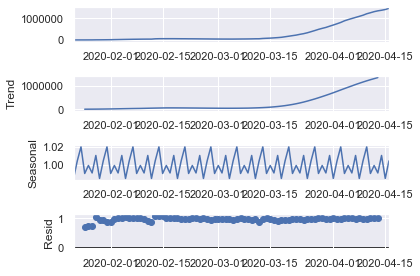

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(active, model='multiplicative')  
result.plot();

### Augmented Dickey-Fuller Test

In [24]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [25]:
adf_test(datewise['Confirmed'])

Augmented Dickey-Fuller Test: 
ADF test statistic       4.010708
p-value                  1.000000
# lags used             11.000000
# observations          74.000000
critical value (1%)     -3.521980
critical value (5%)     -2.901470
critical value (10%)    -2.588072
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [26]:
adf_test(datewise['Recovered'])

Augmented Dickey-Fuller Test: 
ADF test statistic       2.992528
p-value                  1.000000
# lags used             12.000000
# observations          73.000000
critical value (1%)     -3.523284
critical value (5%)     -2.902031
critical value (10%)    -2.588371
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [27]:
adf_test(datewise['Deaths'])

Augmented Dickey-Fuller Test: 
ADF test statistic       4.828288
p-value                  1.000000
# lags used             11.000000
# observations          74.000000
critical value (1%)     -3.521980
critical value (5%)     -2.901470
critical value (10%)    -2.588072
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [28]:
adf_test(datewise['Active'])

Augmented Dickey-Fuller Test: 
ADF test statistic       2.071421
p-value                  0.998759
# lags used             12.000000
# observations          73.000000
critical value (1%)     -3.523284
critical value (5%)     -2.902031
critical value (10%)    -2.588371
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


### Countrywise Analysis

In [29]:
#Calculating countrywise Moratality and Recovery Rate
countrywise=covid[covid["ObservationDate"]==covid["ObservationDate"].max()].groupby(["Country/Region"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'}).sort_values(["Confirmed"],ascending=False)
countrywise["Mortality"]=(countrywise["Deaths"]/countrywise["Confirmed"])*100
countrywise["Recovery"]=(countrywise["Recovered"]/countrywise["Confirmed"])*100

In [30]:
countrywise.head()

,Confirmed,Recovered,Deaths,Mortality,Recovery
Country/Region,,,,,
US,667801,54703,32916,4.929013,8.191512
Spain,184948,74797,19315,10.443476,40.442178
Italy,168941,40164,22170,13.122925,23.773980
France,147091,33327,17941,12.197211,22.657403
Germany,137698,77000,4052,2.942672,55.919476


In [31]:
#listing all the countries where the virus has spread to
countries=data['Country/Region'].unique().tolist()
print("Number of affected countries :",len(countries))

Number of affected countries : 220


In [32]:
print("Affected countries :")
print(countries)

Affected countries :
['China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan', 'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France', 'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy', 'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt', 'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan', 'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia', 'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia', 'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands', 'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania', 'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg', 'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic', 'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal', 'Andorra', 'Latvia', 'Morocco', 'Saudi Arabia', 'Senegal', 'Argentina', 'Chile', 'Jordan', 'Ukraine', 'Saint B

In [33]:
#Most affected countries
country_cases = data.groupby('Country/Region', as_index=False).sum()
country_cases["Mortality Rate (per 100)"] = np.round(100*country_cases["Deaths"]/country_cases["Confirmed"],2)
country_cases

,Country/Region,Confirmed,Deaths,Recovered,Mortality Rate (per 100)
0,Azerbaijan,1,0,0,0.00
1,"('St. Martin',)",2,0,0,0.00
2,Afghanistan,9068,263,438,2.90
3,Albania,8584,434,2846,5.06
4,Algeria,30513,3808,5984,12.48
...,...,...,...,...,...
215,Western Sahara,58,0,0,0.00
216,Yemen,7,0,0,0.00
217,Zambia,851,22,253,2.59
218,Zimbabwe,261,44,2,16.86


### Plotting Confirmed, Active and Deaths

In [34]:
top_countries = countrywise.head(10)

In [35]:
top_countries

,Confirmed,Recovered,Deaths,Mortality,Recovery
Country/Region,,,,,
US,667801,54703,32916,4.929013,8.191512
Spain,184948,74797,19315,10.443476,40.442178
Italy,168941,40164,22170,13.122925,23.773980
France,147091,33327,17941,12.197211,22.657403
Germany,137698,77000,4052,2.942672,55.919476
UK,104145,375,13759,13.211388,0.360075
China,82341,77900,3342,4.058731,94.606575
Iran,77995,52229,4869,6.242708,66.964549
Turkey,74193,7089,1643,2.214495,9.554810


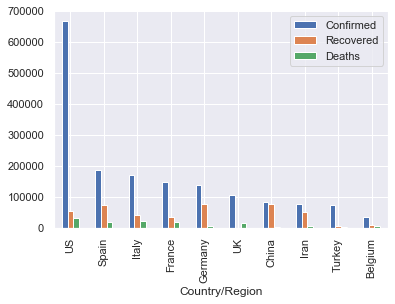

In [36]:
top_countries[['Confirmed','Recovered','Deaths']].plot.bar()

In [37]:
top_countries.reset_index()

,Country/Region,Confirmed,Recovered,Deaths,Mortality,Recovery
0,US,667801,54703,32916,4.929013,8.191512
1,Spain,184948,74797,19315,10.443476,40.442178
2,Italy,168941,40164,22170,13.122925,23.773980
3,France,147091,33327,17941,12.197211,22.657403
4,Germany,137698,77000,4052,2.942672,55.919476
5,UK,104145,375,13759,13.211388,0.360075
6,China,82341,77900,3342,4.058731,94.606575
7,Iran,77995,52229,4869,6.242708,66.964549
8,Turkey,74193,7089,1643,2.214495,9.554810
9,Belgium,34809,7562,4857,13.953288,21.724267


In [38]:
Countries = data.groupby(['ObservationDate', 'Country/Region']).sum().reset_index()

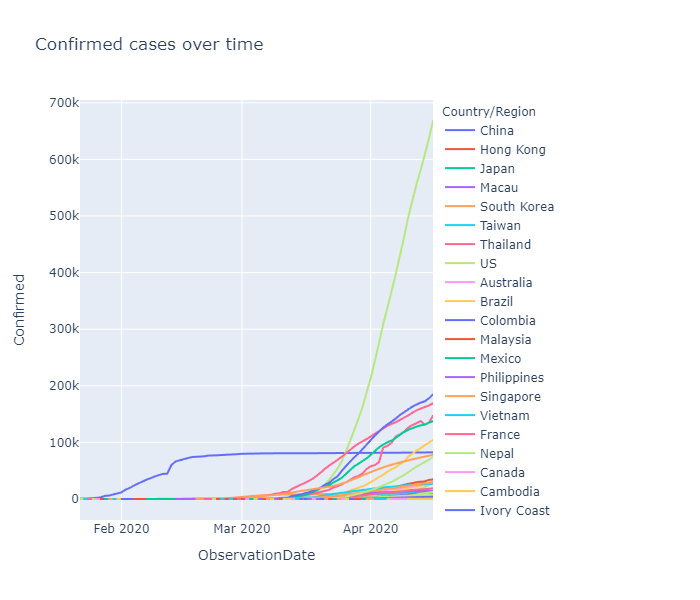

In [39]:
fig = px.line(Countries, x="ObservationDate", y="Confirmed", color='Country/Region', height=600,
             title='Confirmed cases over time')
#fig.show()
Image("images/confirmed cases over time.png", width=800, height=200)

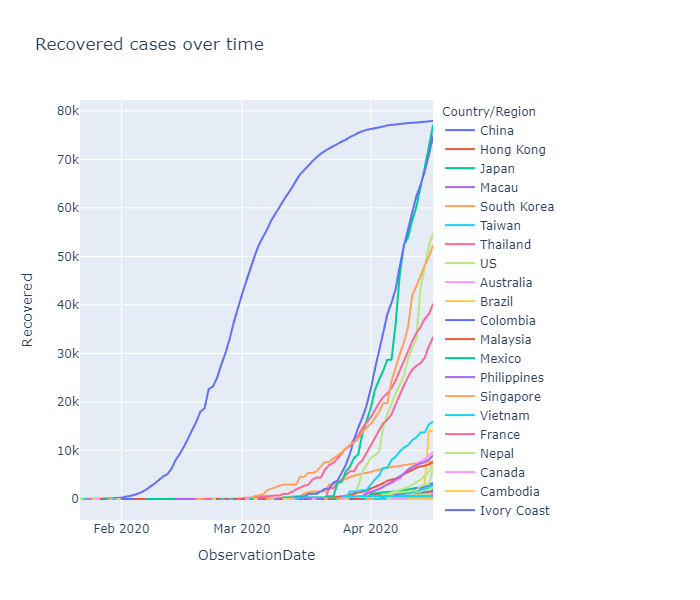

In [40]:
fig = px.line(Countries, x="ObservationDate", y="Recovered", color='Country/Region', height=600,
             title='Recovered cases over time')
#fig.show()

Image("images/recovered cases over time.png", width=800, height=200)

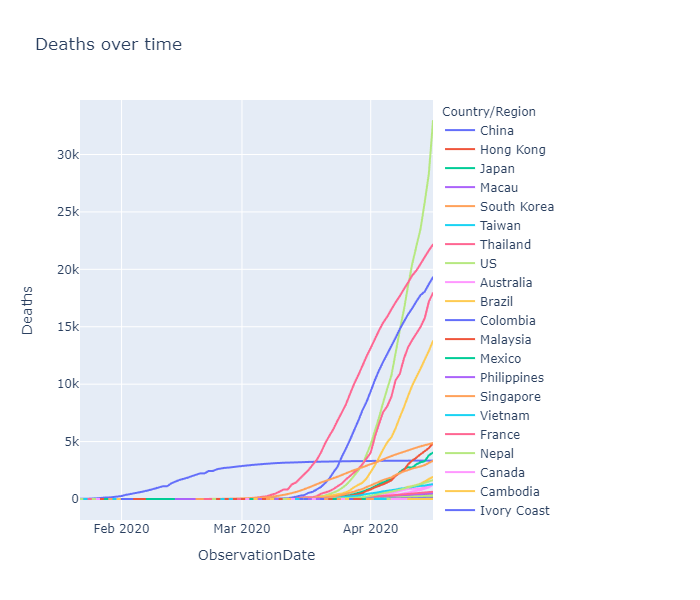

In [41]:
fig = px.line(Countries, x="ObservationDate", y="Deaths", color='Country/Region', height=600,
             title='Deaths over time')
#fig.show()

Image("images/deaths over time.png", width=800, height=200)

- - -

## Analysis of the COVID spread in China

In [42]:
Countries['Active'] = Countries['Confirmed'] - (Countries['Deaths'] + Countries['Recovered'])
Countries.head()

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered,Active
0,2020-01-22,China,547,17,28,502
1,2020-01-22,Hong Kong,0,0,0,0
2,2020-01-22,Japan,2,0,0,2
3,2020-01-22,Macau,1,0,0,1
4,2020-01-22,South Korea,1,0,0,1


In [43]:
China = Countries.loc[(Countries['Country/Region'] == 'China')]

In [44]:
China = China.set_index(China['ObservationDate'])
China.index.freq='D'
China

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered,Active
ObservationDate,,,,,,
2020-01-22,2020-01-22,China,547,17,28,502
2020-01-23,2020-01-23,China,639,18,30,591
2020-01-24,2020-01-24,China,916,26,36,854
2020-01-25,2020-01-25,China,1399,42,39,1318
2020-01-26,2020-01-26,China,2062,56,49,1957
...,...,...,...,...,...,...
2020-04-12,2020-04-12,China,82085,3339,77583,1163
2020-04-13,2020-04-13,China,82159,3341,77666,1152
2020-04-14,2020-04-14,China,82249,3341,77753,1155


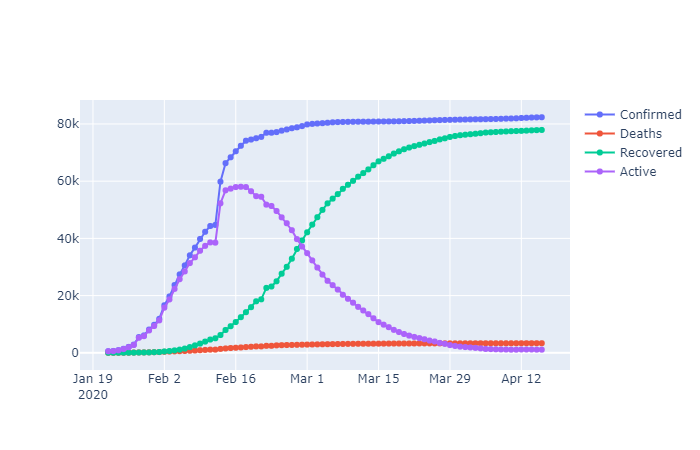

In [45]:
# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=China['ObservationDate'], y=China['Confirmed'],
                    mode='lines+markers',
                    name='Confirmed'))

fig.add_trace(go.Scatter(x=China['ObservationDate'], y=China['Deaths'],
                    mode='lines+markers',
                    name='Deaths'))
fig.add_trace(go.Scatter(x=China['ObservationDate'], y=China['Recovered'],
                    mode='lines+markers',
                    name='Recovered'))
fig.add_trace(go.Scatter(x=China['ObservationDate'], y=China['Active'],
                    mode='lines+markers',
                    name='Active'))



#fig.show()

Image("images/newplot (3).png", width=600, height=200)

In [46]:
CProvinces = data.loc[(data['Country/Region'] == 'China')]
CProvinces.head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,China,1/22/2020 17:00,1,0,0
1,2020-01-22,Beijing,China,1/22/2020 17:00,14,0,0
2,2020-01-22,Chongqing,China,1/22/2020 17:00,6,0,0
3,2020-01-22,Fujian,China,1/22/2020 17:00,1,0,0
4,2020-01-22,Gansu,China,1/22/2020 17:00,0,0,0


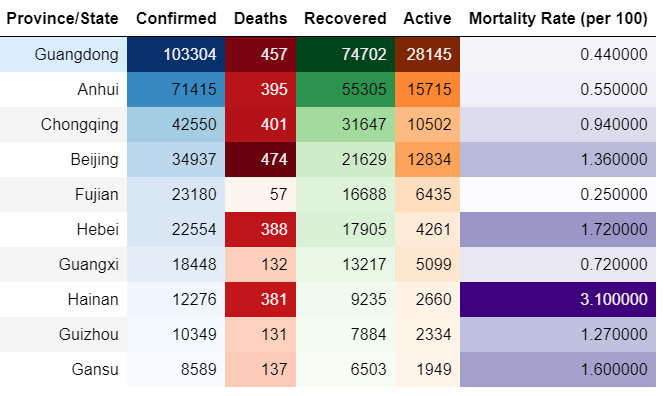

In [47]:
"""
cprov = CProvinces.groupby('Province/State', as_index=False).sum()
cprov = cprov.head(10)
cprov["Mortality Rate (per 100)"] = np.round(100*cprov["Deaths"]/cprov["Confirmed"],2)
cprov.sort_values('Confirmed', ascending= False).style.background_gradient(cmap='Blues',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Recovered"])\
                        .background_gradient(cmap='Oranges',subset=["Active"])\
                        .background_gradient(cmap='Purples',subset=["Mortality Rate (per 100)"])
"""
Image("images/newplot (10).png", width=600, height=200)

### Forecasting Confirmed Cases in China using ARIMA

In [48]:
from pmdarima import auto_arima
auto_arima(China['Confirmed'],seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   86
Model:               SARIMAX(0, 2, 1)   Log Likelihood                -744.238
Date:                Mon, 20 Apr 2020   AIC                           1494.477
Time:                        11:24:37   BIC                           1501.769
Sample:                             0   HQIC                          1497.408
                                 - 86                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -6.1314     95.592     -0.064      0.949    -193.489     181.226
ma.L1         -0.7225      0.080     -9.064      0.000      -0.879      -0.566
sigma2      2.899e+06   2.33e+05     12.462      0.000    2.44e+06    3.35e+06
===================================================================================
Ljung-Box (Q):                        9.16   Jarque-Bera (JB):              5857.96
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                             5.22
Prob(H) (two-sided):                  0.00   Kurtosis:                        42.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [49]:
# Set one month for testing
train = China['Confirmed'].loc[:'2020-03-29']
test = China['Confirmed'].loc['2020-03-29':]

In [50]:
len(test)

19

In [51]:
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
model = ARIMA(train,order=(0,2,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D2.Confirmed   No. Observations:                   66
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -592.951
Method:                       css-mle   S.D. of innovations           1919.120
Date:                Mon, 20 Apr 2020   AIC                           1191.903
Time:                        11:24:37   BIC                           1198.471
Sample:                    01-24-2020   HQIC                          1194.498
                         - 03-29-2020                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -10.8547     68.965     -0.157      0.875    -146.023     124.314
ma.L1.D2.Confirmed    -0.7206      0.095     -7.550      0.000      -0.908      -0.534
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.3877           +0.0000j            1.3877            0.0000
-----------------------------------------------------------------------------
"""

In [52]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels')

In [53]:
test

ObservationDate
2020-03-29    81444
2020-03-30    81478
2020-03-31    81524
2020-04-01    81555
2020-04-02    81589
2020-04-03    81623
2020-04-04    81638
2020-04-05    81668
2020-04-06    81707
2020-04-07    81739
2020-04-08    81804
2020-04-09    81865
2020-04-10    81907
2020-04-11    81969
2020-04-12    82085
2020-04-13    82159
2020-04-14    82249
2020-04-15    82294
2020-04-16    82341
Freq: D, Name: Confirmed, dtype: int32

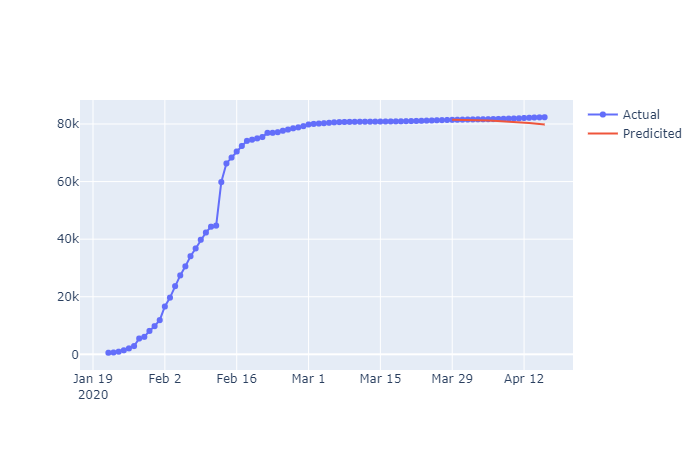

In [54]:
import plotly.graph_objects as go
# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=China['ObservationDate'], y=China['Confirmed'],
                    mode='lines+markers',
                    name='Actual'))
fig.add_trace(go.Scatter(x=test.index, y=predictions,
                    mode='lines',
                    name='Predicited'))


#fig.show()
Image("images/newplot (5).png", width=600, height=200)

In [55]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("Standard deviation of test data: ", np.std(test))
print(mean_absolute_error(test, predictions))
print(np.sqrt(mean_squared_error(test,predictions)))

Standard deviation of test data:  279.1987546504066
914.5223492404338
1213.5457915181203


- - -

## Analysis of COVID spread in USA

In [56]:
USA = Countries.loc[(Countries['Country/Region'] == 'US')]
USA = USA.set_index(USA['ObservationDate'])
USA.index.freq='D'
USAStates = data.loc[(data['Country/Region'] == 'US')]
USAStates

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
31,2020-01-22,Washington,US,1/22/2020 17:00,1,0,0
69,2020-01-23,Washington,US,1/23/20 17:00,1,0,0
117,2020-01-24,Washington,US,1/24/20 17:00,1,0,0
118,2020-01-24,Chicago,US,1/24/20 17:00,1,0,0
158,2020-01-25,Washington,US,1/25/20 17:00,1,0,0
...,...,...,...,...,...,...,...
15759,2020-04-16,Virginia,US,2020-04-16 23:38:19,6889,208,0
15760,2020-04-16,Washington,US,2020-04-16 23:38:19,11057,579,0
15761,2020-04-16,West Virginia,US,2020-04-16 23:38:19,728,12,0
15763,2020-04-16,Wisconsin,US,2020-04-16 23:38:19,3875,197,0


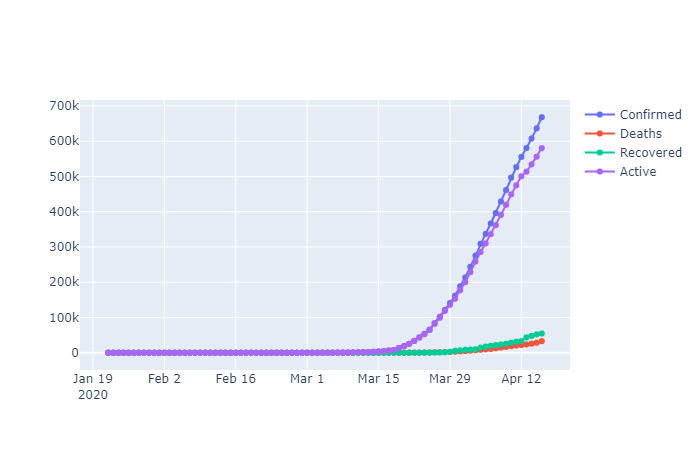

In [57]:
# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=USA['ObservationDate'], y=USA['Confirmed'],
                    mode='lines+markers',
                    name='Confirmed'))
fig.add_trace(go.Scatter(x=USA['ObservationDate'], y=USA['Deaths'],
                    mode='lines+markers',
                    name='Deaths'))
fig.add_trace(go.Scatter(x=USA['ObservationDate'], y=USA['Recovered'],
                    mode='lines+markers',
                    name='Recovered'))

fig.add_trace(go.Scatter(x=USA['ObservationDate'], y=USA['Active'],
                    mode='lines+markers',
                    name='Active'))



#fig.show()

Image("images/newplot (6).png", width=600, height=200)

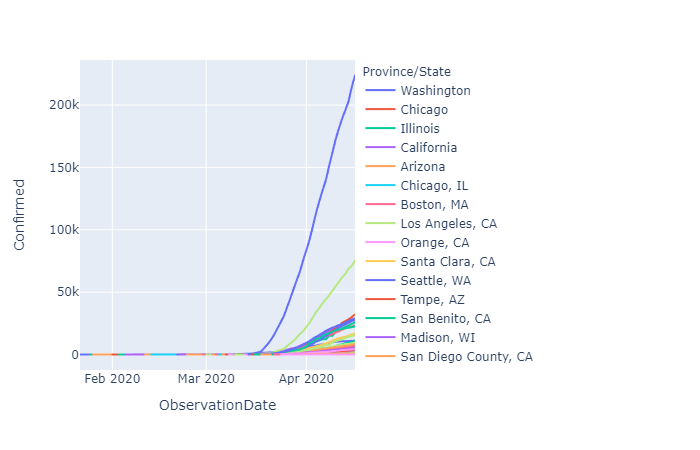

In [58]:
fig = px.line(USAStates, x="ObservationDate", y="Confirmed", color="Province/State")
#fig.show()

Image("images/newplot (7).png")

In [59]:
states = USAStates.groupby('Province/State', as_index=False).sum()
states["Mortality Rate (per 100)"] = np.round(100*states["Deaths"]/states["Confirmed"],2)

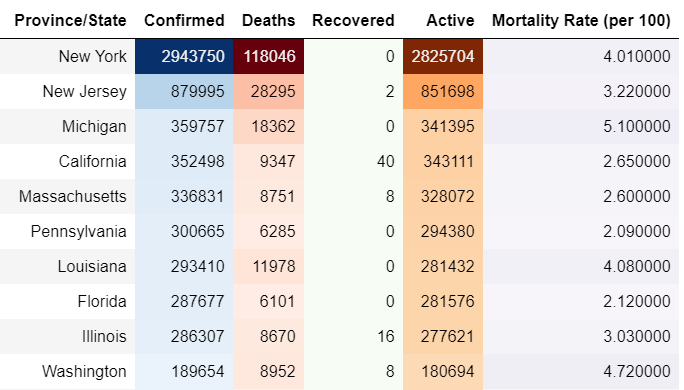

In [60]:
"""
states.sort_values('Confirmed', ascending= False).style.background_gradient(cmap='Blues',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Recovered"])\
                        .background_gradient(cmap='Oranges',subset=["Active"])\
                        .background_gradient(cmap='Purples',subset=["Mortality Rate (per 100)"])
"""
Image("images/newplot (11).png", width=500, height=100)

### Forecasting Confirmed Cases in USA using ARIMA

In [61]:
from pmdarima import auto_arima
auto_arima(USA['Confirmed'],seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   86
Model:               SARIMAX(2, 2, 1)   Log Likelihood                -734.821
Date:                Mon, 20 Apr 2020   AIC                           1479.643
Time:                        11:24:42   BIC                           1491.797
Sample:                             0   HQIC                          1484.528
                                 - 86                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    346.4810    466.839      0.742      0.458    -568.507    1261.469
ar.L1         -0.4788      0.225     -2.126      0.034      -0.920      -0.037
ar.L2          0.2992      0.124      2.420      0.016       0.057       0.541
ma.L1          0.5103      0.192      2.661      0.008       0.134       0.886
sigma2      2.432e+06   2.22e+05     10.954      0.000       2e+06    2.87e+06
===================================================================================
Ljung-Box (Q):                       36.03   Jarque-Bera (JB):               127.47
Prob(Q):                              0.65   Prob(JB):                         0.00
Heteroskedasticity (H):             117.85   Skew:                             0.94
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [62]:
# Set one month for testing
train = USA['Confirmed'].loc[:'2020-03-29']
test = USA['Confirmed'].loc['2020-03-29':]

In [63]:
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
model = ARIMA(train.astype('float64'),order=(0,2,0))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D2.Confirmed   No. Observations:                   66
Model:                 ARIMA(0, 2, 0)   Log Likelihood                -550.086
Method:                           css   S.D. of innovations           1007.976
Date:                Mon, 20 Apr 2020   AIC                           1104.172
Time:                        11:24:42   BIC                           1108.552
Sample:                    01-24-2020   HQIC                          1105.903
                         - 03-29-2020                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        294.6061    124.073      2.374      0.018      51.427     537.785
==============================================================================
"""

In [64]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels')

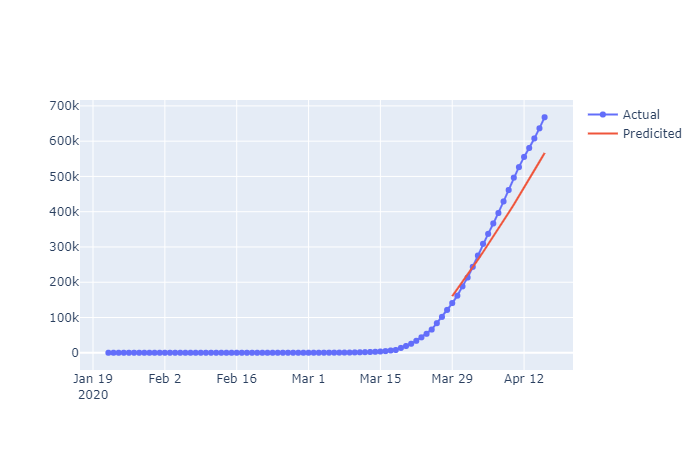

In [65]:
import plotly.graph_objects as go
# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=USA['ObservationDate'], y=USA['Confirmed'],
                    mode='lines+markers',
                    name='Actual'))
fig.add_trace(go.Scatter(x=test.index, y=predictions,
                    mode='lines',
                    name='Predicited'))


#fig.show()
Image("images/newplot (8).png")

In [66]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("Standard deviation of test data: ", np.std(test))
print(mean_absolute_error(test, predictions))
print(np.sqrt(mean_squared_error(test,predictions)))

Standard deviation of test data:  164516.67873540186
49966.74641148323
60170.13845408757


- - - 

## Analysis of the COVID spread in India

In [67]:
India = Countries.loc[(Countries['Country/Region'] == 'India')]

In [68]:
India = India.set_index(India['ObservationDate'])
India.index.freq='D'
India

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered,Active
ObservationDate,,,,,,
2020-01-30,2020-01-30,India,1,0,0,1
2020-01-31,2020-01-31,India,1,0,0,1
2020-02-01,2020-02-01,India,1,0,0,1
2020-02-02,2020-02-02,India,2,0,0,2
2020-02-03,2020-02-03,India,3,0,0,3
...,...,...,...,...,...,...
2020-04-12,2020-04-12,India,9205,331,1080,7794
2020-04-13,2020-04-13,India,10453,358,1181,8914
2020-04-14,2020-04-14,India,11487,393,1359,9735


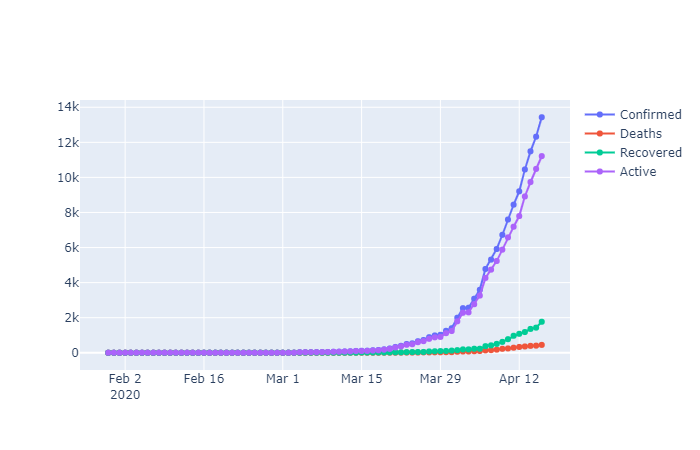

In [69]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=India['ObservationDate'], y=India['Confirmed'],
                    mode='lines+markers',
                    name='Confirmed'))

fig.add_trace(go.Scatter(x=India['ObservationDate'], y=India['Deaths'],
                    mode='lines+markers',
                    name='Deaths'))

fig.add_trace(go.Scatter(x=India['ObservationDate'], y=India['Recovered'],
                    mode='lines+markers',
                    name='Recovered'))

fig.add_trace(go.Scatter(x=India['ObservationDate'], y=India['Active'],
                    mode='lines+markers',
                    name='Active'))



#fig.show()
Image("images/newplot_2.png")

In [70]:
from statsmodels.tsa.ar_model import AR,ARResults

train = India.iloc[:72] # Goes up to but not including 72
test = India.iloc[72:]

model = AR(India['Confirmed'])

ARfit = model.fit(ic='t-stat')

ARfit.params

const            15.558925
L1.Confirmed      1.102473
L2.Confirmed      0.171382
L3.Confirmed     -0.301991
L4.Confirmed      0.742426
L5.Confirmed      0.066494
L6.Confirmed     -1.348739
L7.Confirmed      0.408795
L8.Confirmed     -0.188069
L9.Confirmed     -0.725482
L10.Confirmed     0.501175
L11.Confirmed     1.026425
dtype: float64

In [71]:
print(f'Lag: {ARfit.k_ar}')

Lag: 11


In [72]:
start = len(train)
end = len(train)+len(test)-1
rename = 'AR Predictions'

predictions = ARfit.predict(start=start,end=end,dynamic=False).rename(rename)

predictions

ObservationDate
2020-04-11     8547.061872
2020-04-12     9249.479029
2020-04-13    10479.032698
2020-04-14    11524.584599
2020-04-15    12311.671328
2020-04-16    13421.019810
Freq: D, Name: AR Predictions, dtype: float64

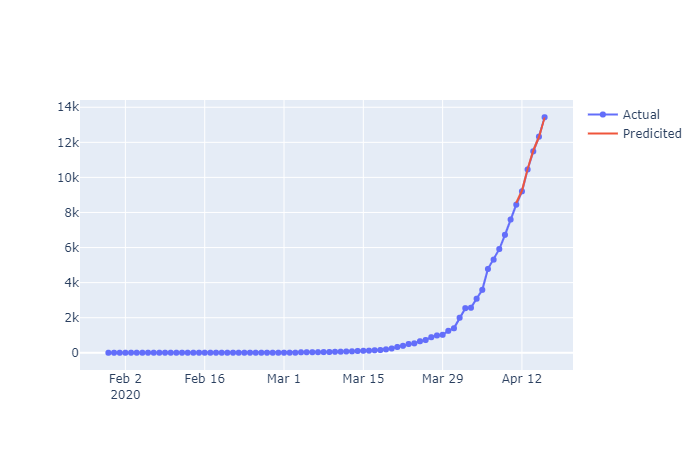

In [73]:
import plotly.graph_objects as go
# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=India['ObservationDate'], y=India['Confirmed'],
                    mode='lines+markers',
                    name='Actual'))
fig.add_trace(go.Scatter(x=test.index, y=predictions,
                    mode='lines',
                    name='Predicited'))


#fig.show()
Image("images/newplot_4.png")

In [74]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("Standard deviation of test data: ", np.std(test['Confirmed']))
print(mean_absolute_error(test['Confirmed'], predictions))
print(np.sqrt(mean_squared_error(test['Confirmed'],predictions)))

Standard deviation of test data:  1725.3966452191025
38.07784337542034
49.10789952160168


- - -

### Analysis of the COVID spread in Italy

In [75]:
Italy = Countries.loc[(Countries['Country/Region'] == 'Italy')]
Italy = Italy.set_index(Italy['ObservationDate'])
Italy.index.freq = 'D'

In [76]:
Italy.tail()

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered,Active
ObservationDate,,,,,,
2020-04-12,2020-04-12,Italy,156363,19899,34211,102253
2020-04-13,2020-04-13,Italy,159516,20465,35435,103616
2020-04-14,2020-04-14,Italy,162488,21067,37130,104291
2020-04-15,2020-04-15,Italy,165155,21645,38092,105418
2020-04-16,2020-04-16,Italy,168941,22170,40164,106607


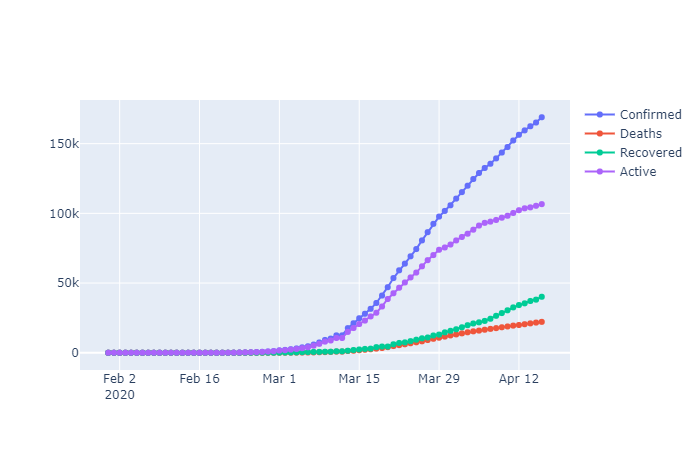

In [77]:
# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=Italy['ObservationDate'], y=Italy['Confirmed'],
                    mode='lines+markers',
                    name='Confirmed'))
fig.add_trace(go.Scatter(x=Italy['ObservationDate'], y=Italy['Deaths'],
                    mode='lines+markers',
                    name='Deaths'))
fig.add_trace(go.Scatter(x=Italy['ObservationDate'], y=Italy['Recovered'],
                    mode='lines+markers',
                    name='Recovered'))

fig.add_trace(go.Scatter(x=Italy['ObservationDate'], y=Italy['Active'],
                    mode='lines+markers',
                    name='Active'))



#fig.show()

Image("images/newplot_3.png", width=600, height=200)

In [78]:
from statsmodels.tsa.ar_model import AR,ARResults

train = Italy.iloc[:72] # Goes up to but not including 72
test = Italy.iloc[72:]

model = AR(Italy['Confirmed'])

ARfit = model.fit(ic='t-stat')

ARfit.params

const            195.955644
L1.Confirmed       1.245707
L2.Confirmed       0.251354
L3.Confirmed      -0.472003
L4.Confirmed       0.034223
L5.Confirmed       0.143390
L6.Confirmed       0.037629
L7.Confirmed      -0.022318
L8.Confirmed      -0.138301
L9.Confirmed      -0.458972
L10.Confirmed      0.067115
L11.Confirmed      0.315191
dtype: float64

In [79]:
print(f'Lag: {ARfit.k_ar}')

Lag: 11


In [80]:
start = len(train)
end = len(train)+len(test)-1
rename = 'AR Predictions'

predictions = ARfit.predict(start=start,end=end,dynamic=False).rename(rename)

predictions

ObservationDate
2020-04-12    155858.477727
2020-04-13    159975.597973
2020-04-14    162819.786988
2020-04-15    165914.891509
2020-04-16    169040.524212
Freq: D, Name: AR Predictions, dtype: float64

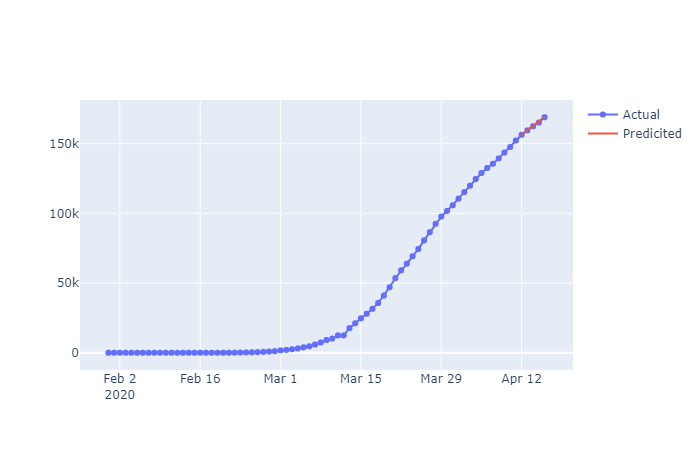

In [81]:
import plotly.graph_objects as go
# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=Italy['ObservationDate'], y=Italy['Confirmed'],
                    mode='lines+markers',
                    name='Actual'))
fig.add_trace(go.Scatter(x=test.index, y=predictions,
                    mode='lines',
                    name='Predicited'))


#fig.show()
Image("images/newplot_5.png")

In [82]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("Standard deviation of test data: ", np.std(test['Confirmed']))
print(mean_absolute_error(test['Confirmed'], predictions))
print(np.sqrt(mean_squared_error(test['Confirmed'],predictions)))

Standard deviation of test data:  4361.247555459332
431.06459093826123
482.3268186070284


- - -

- - -

## Holt's Winter Model

#### Analysis of Confirmed Cases

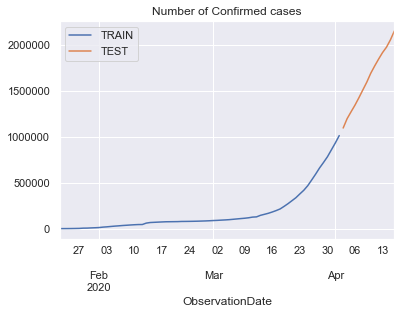

In [83]:
train_data = datewise['Confirmed'].iloc[:72] # Goes up to but not including 72
test_data = datewise['Confirmed'].iloc[72:]

train_data.plot(legend=True,label='TRAIN')
test_data.plot(legend=True,label='TEST',title="Number of Confirmed cases");

In [84]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(train_data,trend='add',seasonal='mul',seasonal_periods=4).fit()

test_predictions = fitted_model.forecast(14).rename('HW Forecast')

test_predictions

2020-04-03    1.091013e+06
2020-04-04    1.181719e+06
2020-04-05    1.260575e+06
2020-04-06    1.329071e+06
2020-04-07    1.412124e+06
2020-04-08    1.505690e+06
2020-04-09    1.583998e+06
2020-04-10    1.649514e+06
2020-04-11    1.733236e+06
2020-04-12    1.829661e+06
2020-04-13    1.907420e+06
2020-04-14    1.969956e+06
2020-04-15    2.054348e+06
2020-04-16    2.153631e+06
Freq: D, Name: HW Forecast, dtype: float64

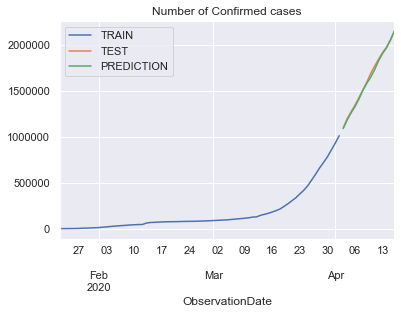

In [85]:
train_data.plot(legend=True,label='TRAIN')
test_data.plot(legend=True,label='TEST')
test_predictions.plot(legend=True,label='PREDICTION',title="Number of Confirmed cases");

In [86]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

hw_mae = mean_absolute_error(test_data,test_predictions)
hw_mse = mean_squared_error(test_data,test_predictions)
hw_rmse = np.sqrt(mean_squared_error(test_data,test_predictions))

print("MAE :",hw_mae)
print("MSE :",hw_mse)
print("RMSE :",hw_rmse)

MAE : 13945.053142675499
MSE : 335045972.9493327
RMSE : 18304.261059909866


In [87]:
test_data.describe()

count    1.400000e+01
mean     1.632516e+06
std      3.358485e+05
min      1.095917e+06
25%      1.365350e+06
50%      1.643534e+06
75%      1.899660e+06
max      2.152647e+06
Name: Confirmed, dtype: float64

Comparing the errors with the average values of the test data:

The standard deviation is found to be 3.358485e+05.
The root mean squared error is only 18304.261.
The model is also performing well visually.

#### Forecasting into Future

In [88]:
final_model = ExponentialSmoothing(datewise['Confirmed'],trend='add',seasonal='mul',seasonal_periods=4).fit()
forecast_predictions = final_model.forecast(15)

forecast_predictions

2020-04-17    2.233095e+06
2020-04-18    2.307476e+06
2020-04-19    2.387699e+06
2020-04-20    2.478585e+06
2020-04-21    2.562273e+06
2020-04-22    2.635529e+06
2020-04-23    2.715507e+06
2020-04-24    2.807578e+06
2020-04-25    2.891451e+06
2020-04-26    2.963582e+06
2020-04-27    3.043314e+06
2020-04-28    3.136572e+06
2020-04-29    3.220629e+06
2020-04-30    3.291635e+06
2020-05-01    3.371121e+06
Freq: D, dtype: float64

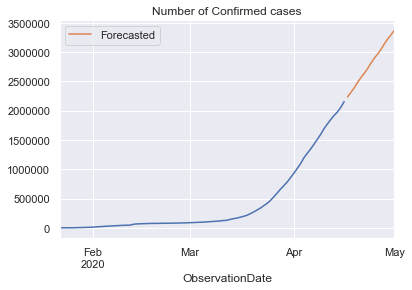

In [89]:
datewise['Confirmed'].plot()
forecast_predictions.plot(legend=True, label = "Forecasted",title="Number of Confirmed cases");

#### Analysis of Recovered cases

In [90]:
train_data = datewise['Recovered'].iloc[:72] # Goes up to but not including 72
test_data = datewise['Recovered'].iloc[72:]


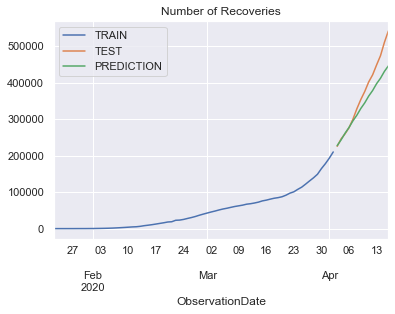

In [91]:
fitted_model = ExponentialSmoothing(train_data,trend='add',seasonal='mul',seasonal_periods=2).fit()

test_predictions = fitted_model.forecast(14).rename('HW Forecast')

train_data.plot(legend=True,label='TRAIN')
test_data.plot(legend=True,label='TEST')
test_predictions.plot(legend=True,label='PREDICTION',title="Number of Recoveries");

In [92]:
final_model = ExponentialSmoothing(datewise['Recovered'],trend='add',seasonal='mul',seasonal_periods=4).fit()
forecast_predictions = final_model.forecast(15)

forecast_predictions

2020-04-17    5.717120e+05
2020-04-18    6.003424e+05
2020-04-19    6.360773e+05
2020-04-20    6.677596e+05
2020-04-21    6.969833e+05
2020-04-22    7.250554e+05
2020-04-23    7.616902e+05
2020-04-24    7.934250e+05
2020-04-25    8.222546e+05
2020-04-26    8.497684e+05
2020-04-27    8.873031e+05
2020-04-28    9.190904e+05
2020-04-29    9.475259e+05
2020-04-30    9.744815e+05
2020-05-01    1.012916e+06
Freq: D, dtype: float64

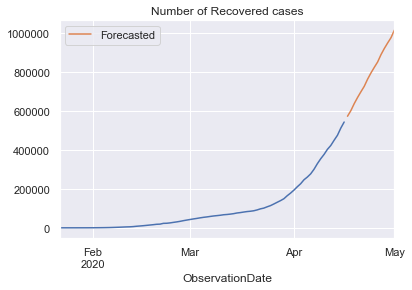

In [93]:
datewise['Recovered'].plot()
forecast_predictions.plot(legend=True, label = "Forecasted",title="Number of Recovered cases");

#### Analysis of Deaths

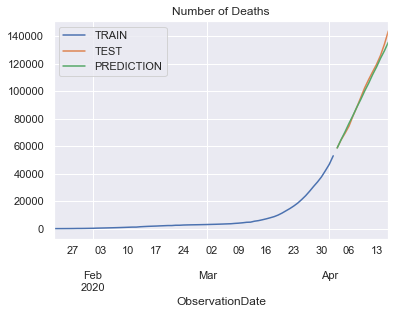

In [94]:
train_data = datewise['Deaths'].iloc[:72] # Goes up to but not including 72
test_data = datewise['Deaths'].iloc[72:]

fitted_model = ExponentialSmoothing(train_data,trend='add',seasonal='mul',seasonal_periods=2).fit()

test_predictions = fitted_model.forecast(14).rename('HW Forecast')

train_data.plot(legend=True,label='TRAIN')
test_data.plot(legend=True,label='TEST')
test_predictions.plot(legend=True,label='PREDICTION',title="Number of Deaths");

In [95]:
final_model = ExponentialSmoothing(datewise['Deaths'],trend='add',seasonal='mul',seasonal_periods=4).fit()
forecast_predictions = final_model.forecast(15)

forecast_predictions

2020-04-17    151099.839857
2020-04-18    159851.118973
2020-04-19    169306.781951
2020-04-20    177342.870450
2020-04-21    185308.471444
2020-04-22    194102.416261
2020-04-23    203739.660892
2020-04-24    211665.021653
2020-04-25    219517.103032
2020-04-26    228353.713550
2020-04-27    238172.539833
2020-04-28    245987.172857
2020-04-29    253725.734619
2020-04-30    262605.010838
2020-05-01    272605.418775
Freq: D, dtype: float64

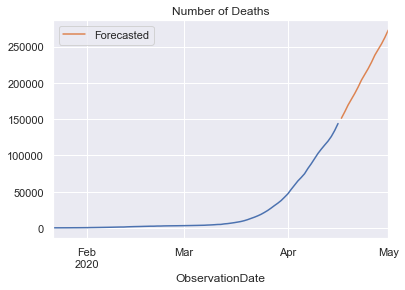

In [96]:
datewise['Deaths'].plot()
forecast_predictions.plot(legend=True, label = "Forecasted",title="Number of Deaths");

#### Analysis of Active cases

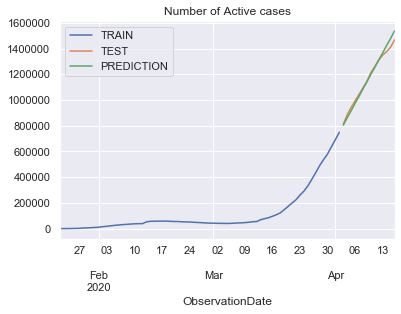

In [97]:
train_data = datewise['Active'].iloc[:72] # Goes up to but not including 72
test_data = datewise['Active'].iloc[72:]

fitted_model = ExponentialSmoothing(train_data,trend='add',seasonal='mul',seasonal_periods=2).fit()

test_predictions = fitted_model.forecast(14).rename('HW Forecast')

train_data.plot(legend=True,label='TRAIN')
test_data.plot(legend=True,label='TEST')
test_predictions.plot(legend=True,label='PREDICTION',title="Number of Active cases");

In [98]:
final_model = ExponentialSmoothing(datewise['Active'],trend='add',seasonal='mul',seasonal_periods=4).fit()
forecast_predictions = final_model.forecast(15)

forecast_predictions

2020-04-17    1.503685e+06
2020-04-18    1.544847e+06
2020-04-19    1.582060e+06
2020-04-20    1.633707e+06
2020-04-21    1.672570e+06
2020-04-22    1.713617e+06
2020-04-23    1.750301e+06
2020-04-24    1.802941e+06
2020-04-25    1.841456e+06
2020-04-26    1.882386e+06
2020-04-27    1.918541e+06
2020-04-28    1.972174e+06
2020-04-29    2.010341e+06
2020-04-30    2.051156e+06
2020-05-01    2.086781e+06
Freq: D, dtype: float64

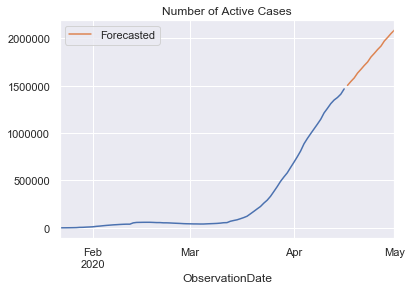

In [99]:
datewise['Active'].plot()
forecast_predictions.plot(legend=True, label = "Forecasted",title="Number of Active Cases");

### Holt's Winter Model Summary:

**Predicted statistics for 2020-05-01:** 

**1. Number of confirmed cases : 3,371,121**

**2. Number of active cases : 2,086,781**

**3. Number of recovered cases : 974,482**

**4. Number of deaths          : 262,605**

**5. Root mean squared error : 18304.261**

- - -

## Autoregressive Model

#### Analysis of Confirmed cases

In [100]:
from statsmodels.tsa.ar_model import AR,ARResults

In [101]:
train = datewise.iloc[:72] # Goes up to but not including 72
test = datewise.iloc[72:]

model = AR(datewise['Confirmed'])

ARfit = model.fit(ic='t-stat')

ARfit.params

const           -76.709143
L1.Confirmed      1.306685
L2.Confirmed     -0.090194
L3.Confirmed      0.118481
L4.Confirmed     -0.168416
L5.Confirmed     -0.091338
L6.Confirmed      0.358309
L7.Confirmed     -0.187743
L8.Confirmed     -0.114298
L9.Confirmed     -0.369498
L10.Confirmed    -0.500665
L11.Confirmed     0.291123
L12.Confirmed     0.487250
dtype: float64

In [102]:
print(f'Lag: {ARfit.k_ar}')

Lag: 12


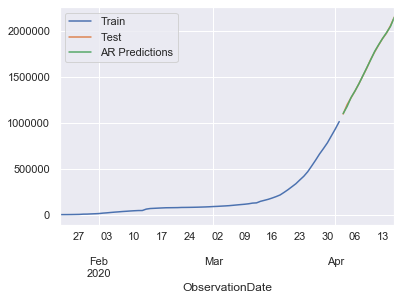

In [103]:
start = len(train)
end = len(train)+len(test)-1
rename = 'AR Predictions'

predictions = ARfit.predict(start=start,end=end,dynamic=False).rename(rename)

train['Confirmed'].plot(label = 'Train', legend=True)
test['Confirmed'].plot(label = 'Test', legend=True)
predictions.plot(legend=True);

In [104]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

ar_mae = mean_absolute_error(test['Confirmed'],predictions)
ar_mse = mean_squared_error(test['Confirmed'],predictions)
ar_rmse = np.sqrt(mean_squared_error(test['Confirmed'],predictions))

print('MAE :',ar_mae)
print('MSE :',ar_mse)
print('RMSE :',ar_rmse)

MAE : 4873.525016778398
MSE : 44685391.23085229
RMSE : 6684.713249710288


#### Forecasting

In [105]:
# First, retrain the model on the full dataset
model = AR(datewise['Confirmed'])

# Next, fit the model
ARfit = model.fit(maxlag = 12 ,ic='t-stat')

# Make predictions
fcast = ARfit.predict(start=len(datewise), end=len(datewise)+14, dynamic=False).rename('Forecast')
fcast

2020-04-17    2.243753e+06
2020-04-18    2.333572e+06
2020-04-19    2.423842e+06
2020-04-20    2.508381e+06
2020-04-21    2.608050e+06
2020-04-22    2.737247e+06
2020-04-23    2.892710e+06
2020-04-24    3.075769e+06
2020-04-25    3.272698e+06
2020-04-26    3.474059e+06
2020-04-27    3.700873e+06
2020-04-28    3.970570e+06
2020-04-29    4.290657e+06
2020-04-30    4.672087e+06
2020-05-01    5.106370e+06
Freq: D, Name: Forecast, dtype: float64

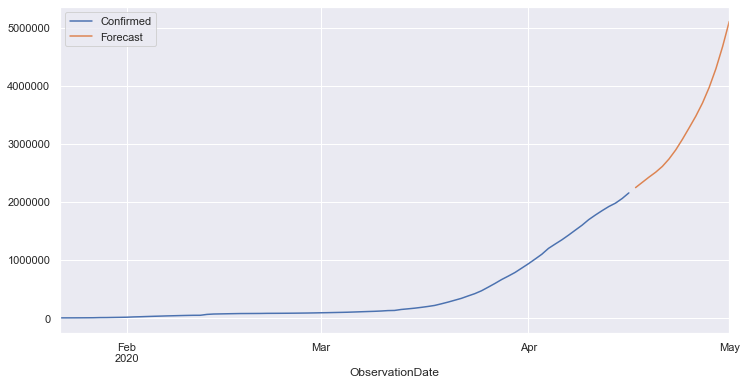

In [106]:
# Plotting the results
datewise['Confirmed'].plot(legend=True)
fcast.plot(legend=True,figsize=(12,6));

In [107]:
fcast

2020-04-17    2.243753e+06
2020-04-18    2.333572e+06
2020-04-19    2.423842e+06
2020-04-20    2.508381e+06
2020-04-21    2.608050e+06
2020-04-22    2.737247e+06
2020-04-23    2.892710e+06
2020-04-24    3.075769e+06
2020-04-25    3.272698e+06
2020-04-26    3.474059e+06
2020-04-27    3.700873e+06
2020-04-28    3.970570e+06
2020-04-29    4.290657e+06
2020-04-30    4.672087e+06
2020-05-01    5.106370e+06
Freq: D, Name: Forecast, dtype: float64

#### Analysis of Recovered Cases

In [108]:
train = datewise.iloc[:72] # Goes up to but not including 72
test = datewise.iloc[72:]

model = AR(datewise['Recovered'])

ARfit = model.fit(ic='t-stat')

ARfit.params

const            204.115464
L1.Recovered       1.356741
L2.Recovered      -0.099329
L3.Recovered      -0.303426
L4.Recovered       0.277484
L5.Recovered      -0.015319
L6.Recovered      -0.048103
L7.Recovered       0.323613
L8.Recovered      -0.559063
L9.Recovered       0.141276
L10.Recovered     -1.074784
L11.Recovered      1.024084
dtype: float64

In [109]:
print(f'Lag: {ARfit.k_ar}')

Lag: 11


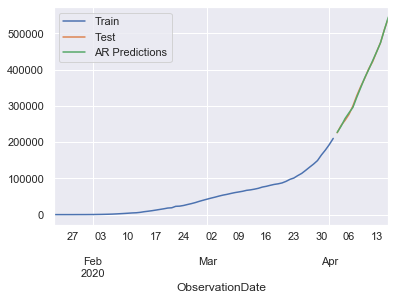

In [110]:
start = len(train)
end = len(train)+len(test)-1
rename = 'AR Predictions'

predictions = ARfit.predict(start=start,end=end,dynamic=False).rename(rename)

train['Recovered'].plot(label = 'Train', legend=True)
test['Recovered'].plot(label = 'Test', legend=True)
predictions.plot(legend=True);

In [111]:
# First, retrain the model on the full dataset
model = AR(datewise['Recovered'])

# Next, fit the model
ARfit = model.fit(maxlag = 11 ,ic='t-stat')

# Make predictions
fcast = ARfit.predict(start=len(datewise), end=len(datewise)+14, dynamic=False).rename('Forecast')
fcast

2020-04-17    5.706611e+05
2020-04-18    5.938969e+05
2020-04-19    6.186819e+05
2020-04-20    6.517433e+05
2020-04-21    6.834601e+05
2020-04-22    7.271488e+05
2020-04-23    7.626539e+05
2020-04-24    8.016528e+05
2020-04-25    8.275470e+05
2020-04-26    8.613735e+05
2020-04-27    9.017917e+05
2020-04-28    9.531384e+05
2020-04-29    1.011638e+06
2020-04-30    1.062151e+06
2020-05-01    1.117456e+06
Freq: D, Name: Forecast, dtype: float64

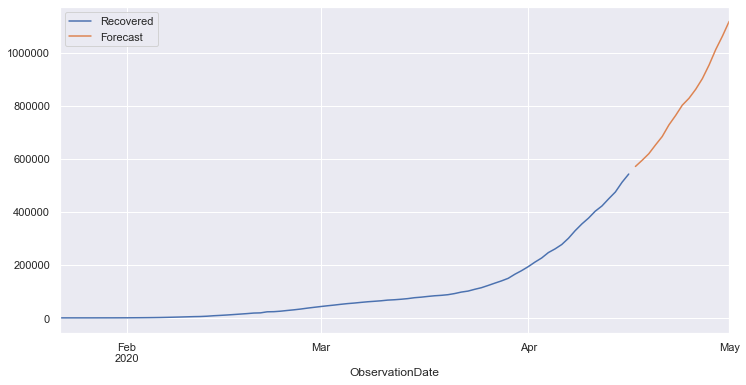

In [112]:
# Plotting the results
datewise['Recovered'].plot(legend=True)
fcast.plot(legend=True,figsize=(12,6));

In [113]:
fcast

2020-04-17    5.706611e+05
2020-04-18    5.938969e+05
2020-04-19    6.186819e+05
2020-04-20    6.517433e+05
2020-04-21    6.834601e+05
2020-04-22    7.271488e+05
2020-04-23    7.626539e+05
2020-04-24    8.016528e+05
2020-04-25    8.275470e+05
2020-04-26    8.613735e+05
2020-04-27    9.017917e+05
2020-04-28    9.531384e+05
2020-04-29    1.011638e+06
2020-04-30    1.062151e+06
2020-05-01    1.117456e+06
Freq: D, Name: Forecast, dtype: float64

#### Analysis of Deaths

In [114]:
train = datewise.iloc[:72] # Goes up to but not including 72
test = datewise.iloc[72:]

model = AR(datewise['Deaths'])

ARfit = model.fit(ic='t-stat')

ARfit.params

const        -35.692392
L1.Deaths      1.498146
L2.Deaths     -0.461272
L3.Deaths      0.273730
L4.Deaths     -0.230632
L5.Deaths      0.438929
L6.Deaths     -0.285789
L7.Deaths      0.126274
L8.Deaths     -0.480481
L9.Deaths     -0.137180
L10.Deaths    -0.499476
L11.Deaths    -0.178047
L12.Deaths     1.038335
dtype: float64

In [115]:
print(f'Lag: {ARfit.k_ar}')

Lag: 12


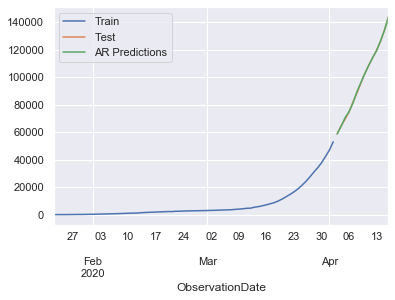

In [116]:
start = len(train)
end = len(train)+len(test)-1
rename = 'AR Predictions'

predictions = ARfit.predict(start=start,end=end,dynamic=False).rename(rename)

train['Deaths'].plot(label = 'Train', legend=True)
test['Deaths'].plot(label = 'Test', legend=True)
predictions.plot(legend=True);

In [117]:
# First, retrain the model on the full dataset
model = AR(datewise['Deaths'])

# Next, fit the model
ARfit = model.fit(maxlag = 12 ,ic='t-stat')

# Make predictions
fcast = ARfit.predict(start=len(datewise), end=len(datewise)+14, dynamic=False).rename('Forecast')
fcast

2020-04-17    152336.137361
2020-04-18    159435.853526
2020-04-19    167929.083829
2020-04-20    178332.260890
2020-04-21    192466.810176
2020-04-22    211183.986807
2020-04-23    233175.496436
2020-04-24    257580.008404
2020-04-25    283825.213725
2020-04-26    313797.059299
2020-04-27    351166.736662
2020-04-28    399734.330701
2020-04-29    459337.313266
2020-04-30    526598.678971
2020-05-01    600057.757350
Freq: D, Name: Forecast, dtype: float64

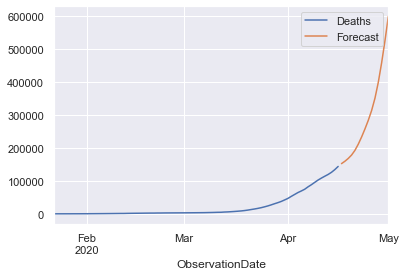

In [118]:
# Plotting the results
datewise['Deaths'].plot(legend=True)
fcast.plot(legend=True);

#### Analysis of Active cases

In [119]:
train = datewise.iloc[:72] # Goes up to but not including 72
test = datewise.iloc[72:]

model = AR(datewise['Active'])

ARfit = model.fit(ic='t-stat')

ARfit.params

const        -112.565384
L1.Active       1.418746
L2.Active      -0.251592
L3.Active       0.166971
L4.Active      -0.261623
L5.Active      -0.028677
L6.Active       0.479050
L7.Active      -0.454952
L8.Active       0.164389
L9.Active      -0.556254
L10.Active     -0.032948
L11.Active     -0.272089
L12.Active      0.664946
dtype: float64

In [120]:
print(f'Lag: {ARfit.k_ar}')

Lag: 12


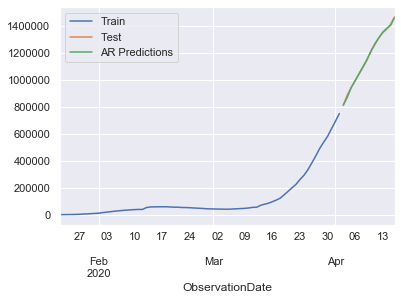

In [121]:
start = len(train)
end = len(train)+len(test)-1
rename = 'AR Predictions'

predictions = ARfit.predict(start=start,end=end,dynamic=False).rename(rename)

train['Active'].plot(label = 'Train', legend=True)
test['Active'].plot(label = 'Test', legend=True)
predictions.plot(legend=True);

In [122]:
# First, retrain the model on the full dataset
model = AR(datewise['Active'])

# Next, fit the model
ARfit = model.fit(maxlag = 12 ,ic='t-stat')

# Make predictions
fcast = ARfit.predict(start=len(datewise), end=len(datewise)+14, dynamic=False).rename('Forecast')
fcast

2020-04-17    1.518940e+06
2020-04-18    1.579893e+06
2020-04-19    1.636836e+06
2020-04-20    1.689285e+06
2020-04-21    1.741942e+06
2020-04-22    1.819507e+06
2020-04-23    1.915780e+06
2020-04-24    2.043426e+06
2020-04-25    2.192062e+06
2020-04-26    2.351756e+06
2020-04-27    2.517935e+06
2020-04-28    2.713280e+06
2020-04-29    2.939295e+06
2020-04-30    3.216629e+06
2020-05-01    3.545463e+06
Freq: D, Name: Forecast, dtype: float64

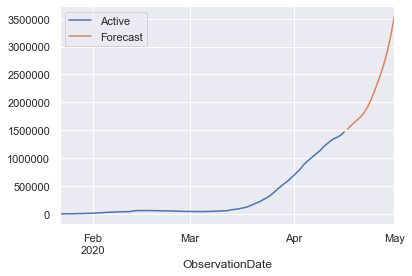

In [123]:
# Plotting the results
datewise['Active'].plot(legend=True)
fcast.plot(legend=True);

In [124]:
int(3.545463e+06)

3545463

### Autoregressive Model Summary:

**Predicted statistics for 2020-05-01:** 

**1. Number of confirmed cases : 5,106,370**

**2. Number of active cases : 3,545,463**

**2. Number of recovered cases : 1,117,456**

**3. Number of deaths          : 600,058**

**4. Root mean squared error : 6684.713**

- - -

## ARIMA(p,d,q)

- - -

#### Analysis of Confirmed cases

In [125]:
from pmdarima import auto_arima

auto_arima(datewise['Confirmed']).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   86
Model:               SARIMAX(0, 2, 1)   Log Likelihood                -857.523
Date:                Mon, 20 Apr 2020   AIC                           1721.046
Time:                        11:25:04   BIC                           1728.338
Sample:                             0   HQIC                          1723.977
                                 - 86                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1407.4831    605.238      2.326      0.020     221.239    2593.727
ma.L1         -0.2106      0.066     -3.180      0.001      -0.340      -0.081
sigma2      4.509e+07      0.010   4.45e+09      0.000    4.51e+07    4.51e+07
===================================================================================
Ljung-Box (Q):                       41.16   Jarque-Bera (JB):                30.26
Prob(Q):                              0.42   Prob(JB):                         0.00
Heteroskedasticity (H):               7.64   Skew:                             0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.53e+25. Standard errors may be unstable.
"""

In [126]:
train = datewise['Confirmed'].iloc[:72]
test = datewise['Confirmed'].iloc[72:]

In [127]:
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
model = ARIMA(train,order=(0,2,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D2.Confirmed   No. Observations:                   70
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -683.140
Method:                       css-mle   S.D. of innovations           4188.277
Date:                Mon, 20 Apr 2020   AIC                           1372.281
Time:                        11:25:04   BIC                           1379.026
Sample:                    01-24-2020   HQIC                          1374.960
                         - 04-02-2020                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1144.2681    426.166      2.685      0.007     308.998    1979.538
ma.L1.D2.Confirmed    -0.1509      0.107     -1.417      0.157      -0.360       0.058
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            6.6262           +0.0000j            6.6262            0.0000
-----------------------------------------------------------------------------
"""

In [128]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels')

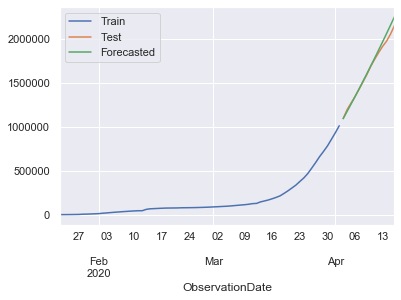

In [129]:
train.plot(label = 'Train', legend=True)
test.plot(label = 'Test', legend=True)
predictions.plot(label = 'Forecasted',legend=True);

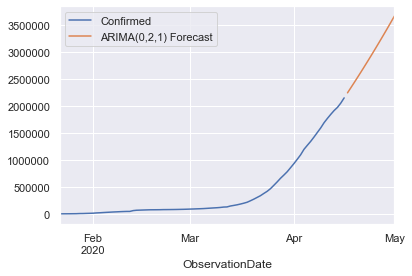

In [130]:
#Retrain the model on the full data, and forecast the future

model = ARIMA(datewise['Confirmed'],order=(0,2,1))
results = model.fit()
fcast = results.predict(len(datewise),len(datewise)+14,typ='levels').rename('ARIMA(0,2,1) Forecast')

datewise['Confirmed'].plot(legend=True)
fcast.plot(legend=True)

In [131]:
fcast

2020-04-17    2.246094e+06
2020-04-18    2.340639e+06
2020-04-19    2.436283e+06
2020-04-20    2.533024e+06
2020-04-21    2.630863e+06
2020-04-22    2.729799e+06
2020-04-23    2.829834e+06
2020-04-24    2.930967e+06
2020-04-25    3.033197e+06
2020-04-26    3.136526e+06
2020-04-27    3.240952e+06
2020-04-28    3.346477e+06
2020-04-29    3.453099e+06
2020-04-30    3.560819e+06
2020-05-01    3.669637e+06
Freq: D, Name: ARIMA(0,2,1) Forecast, dtype: float64

In [132]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

arima_mae = mean_absolute_error(test,predictions)
arima_mse = mean_squared_error(test,predictions)
arima_rmse = np.sqrt(mean_squared_error(test,predictions))

print('MAE :',arima_mae)
print('MSE :',arima_mse)
print('RMSE :',arima_rmse)

MAE : 31562.24233224958
MSE : 2319343316.1484475
RMSE : 48159.56100452378


#### Analysis of Recovered cases

In [133]:
from pmdarima import auto_arima

auto_arima(datewise['Recovered']).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   86
Model:               SARIMAX(1, 2, 0)   Log Likelihood                -767.650
Date:                Mon, 20 Apr 2020   AIC                           1541.300
Time:                        11:25:08   BIC                           1548.592
Sample:                             0   HQIC                          1544.231
                                 - 86                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    581.7938    335.522      1.734      0.083     -75.818    1239.406
ar.L1         -0.4674      0.071     -6.620      0.000      -0.606      -0.329
sigma2      5.128e+06   5.02e+05     10.216      0.000    4.14e+06    6.11e+06
===================================================================================
Ljung-Box (Q):                       29.24   Jarque-Bera (JB):               200.66
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):              50.14   Skew:                             1.87
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [134]:
train = datewise['Recovered'].iloc[:72]
test = datewise['Recovered'].iloc[72:]

In [135]:
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
model = ARIMA(train,order=(1,2,0))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D2.Recovered   No. Observations:                   70
Model:                 ARIMA(1, 2, 0)   Log Likelihood                -590.559
Method:                       css-mle   S.D. of innovations           1114.776
Date:                Mon, 20 Apr 2020   AIC                           1187.119
Time:                        11:25:08   BIC                           1193.864
Sample:                    01-24-2020   HQIC                          1189.798
                         - 04-02-2020                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                238.1207     95.883      2.483      0.013      50.194     426.048
ar.L1.D2.Recovered    -0.3954      0.110     -3.584      0.000      -0.612      -0.179
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.5291           +0.0000j            2.5291            0.5000
-----------------------------------------------------------------------------
"""

In [136]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels')

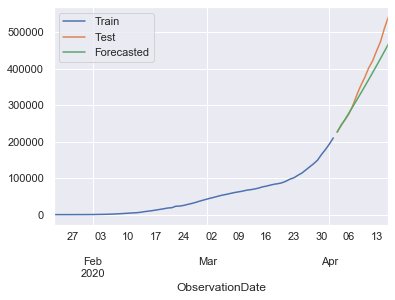

In [137]:
train.plot(label = 'Train', legend=True)
test.plot(label = 'Test', legend=True)
predictions.plot(label = "Forecasted", legend=True);

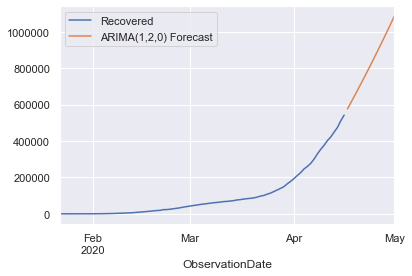

In [138]:
model = ARIMA(datewise['Recovered'],order=(1,2,0))
results = model.fit()
fcast = results.predict(len(datewise),len(datewise)+14,typ='levels').rename('ARIMA(1,2,0) Forecast')

datewise['Recovered'].plot(legend=True)
fcast.plot(legend=True)

In [139]:
fcast

2020-04-17    5.763928e+05
2020-04-18    6.097771e+05
2020-04-19    6.441549e+05
2020-04-20    6.786502e+05
2020-04-21    7.136679e+05
2020-04-22    7.490208e+05
2020-04-23    7.847956e+05
2020-04-24    8.209521e+05
2020-04-25    8.575088e+05
2020-04-26    8.944573e+05
2020-04-27    9.318014e+05
2020-04-28    9.695394e+05
2020-04-29    1.007672e+06
2020-04-30    1.046199e+06
2020-05-01    1.085120e+06
Freq: D, Name: ARIMA(1,2,0) Forecast, dtype: float64

#### Analysis of Deaths

In [140]:
from pmdarima import auto_arima
stepwise_model = auto_arima(datewise['Deaths'], start_p=1, d=1, start_q=1,
                           max_p=3, max_q=3, seasonal=False,trace=True,
                           error_action='ignore',  
                           suppress_warnings=True)
print(stepwise_model.summary())

Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1293.704, BIC=1303.475, Time=0.208 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1575.065, BIC=1579.950, Time=0.013 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1293.014, BIC=1300.342, Time=0.147 seconds
Near non-invertible roots for order (1, 1, 0)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1480.734, BIC=1488.062, Time=0.227 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=1605.188, BIC=1607.630, Time=0.009 seconds
Fit ARIMA: (2, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1295.082, BIC=1307.295, Time=0.279 seconds
Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1293.871, BIC=1306.085, Time=0.419 seconds
Fit ARIMA: (0, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1430.053, BIC=1439.824, Time=0.297 seconds
Fit ARIMA: (2,

In [141]:
train = datewise['Deaths'].iloc[:72]
test = datewise['Deaths'].iloc[72:]

In [142]:
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
model = ARIMA(train,order=(1,1,0))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.Deaths   No. Observations:                   71
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -498.165
Method:                       css-mle   S.D. of innovations            260.657
Date:                Mon, 20 Apr 2020   AIC                           1002.330
Time:                        11:25:13   BIC                           1009.118
Sample:                    01-23-2020   HQIC                          1005.029
                         - 04-02-2020                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2797.6074   2804.804      0.997      0.319   -2699.707    8294.922
ar.L1.D.Deaths     0.9961      0.005    195.404      0.000       0.986       1.006
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0039           +0.0000j            1.0039            0.0000
-----------------------------------------------------------------------------
"""

In [143]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels')

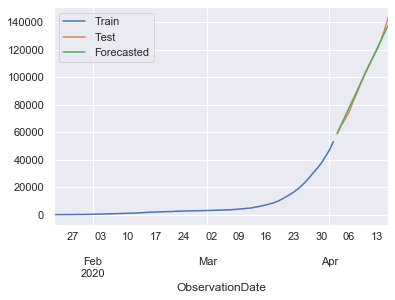

In [144]:
train.plot(label = 'Train', legend=True)
test.plot(label = 'Test', legend=True)
predictions.plot(label = "Forecasted", legend=True);

In [145]:
model = ARIMA(datewise['Deaths'],order=(1,1,0))
results = model.fit()
fcast = results.predict(len(datewise),len(datewise)+14,typ='levels').rename('ARIMA(2,2,3) Forecast')
fcast

2020-04-17    153393.455424
2020-04-18    162954.548567
2020-04-19    172484.460674
2020-04-20    181983.371938
2020-04-21    191451.461516
2020-04-22    200888.907524
2020-04-23    210295.887054
2020-04-24    219672.576170
2020-04-25    229019.149922
2020-04-26    238335.782345
2020-04-27    247622.646473
2020-04-28    256879.914335
2020-04-29    266107.756969
2020-04-30    275306.344423
2020-05-01    284475.845764
Freq: D, Name: ARIMA(2,2,3) Forecast, dtype: float64

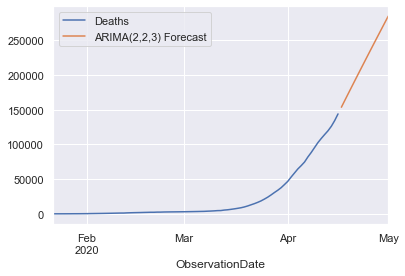

In [146]:
datewise['Deaths'].plot(legend=True)
fcast.plot(legend=True)

#### Analysis of Active cases

In [147]:
from pmdarima import auto_arima

auto_arima(datewise['Active']).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   86
Model:               SARIMAX(0, 2, 1)   Log Likelihood                -851.838
Date:                Mon, 20 Apr 2020   AIC                           1709.675
Time:                        11:25:16   BIC                           1716.968
Sample:                             0   HQIC                          1712.607
                                 - 86                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    810.5902    514.026      1.577      0.115    -196.881    1818.062
ma.L1         -0.2680      0.079     -3.391      0.001      -0.423      -0.113
sigma2      3.946e+07      0.011   3.59e+09      0.000    3.95e+07    3.95e+07
===================================================================================
Ljung-Box (Q):                       57.49   Jarque-Bera (JB):                23.75
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):               8.37   Skew:                             0.46
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.05e+25. Standard errors may be unstable.
"""

In [148]:
train = datewise['Active'].iloc[:72]
test = datewise['Active'].iloc[72:]

In [149]:
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
model = ARIMA(train,order=(0,2,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D2.Active   No. Observations:                   70
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -682.035
Method:                       css-mle   S.D. of innovations           4120.929
Date:                Mon, 20 Apr 2020   AIC                           1370.070
Time:                        11:25:16   BIC                           1376.816
Sample:                    01-24-2020   HQIC                          1372.749
                         - 04-02-2020                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             816.1560    356.396      2.290      0.022     117.633    1514.679
ma.L1.D2.Active    -0.2805      0.108     -2.607      0.009      -0.491      -0.070
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            3.5655           +0.0000j            3.5655            0.0000
-----------------------------------------------------------------------------
"""

In [150]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels')

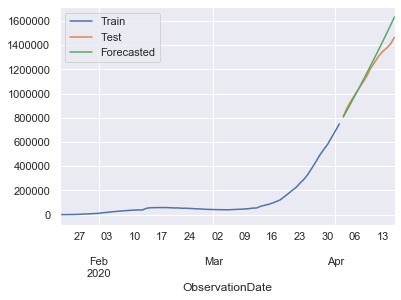

In [151]:
train.plot(label = 'Train', legend=True)
test.plot(label = 'Test', legend=True)
predictions.plot(label = "Forecasted", legend=True);

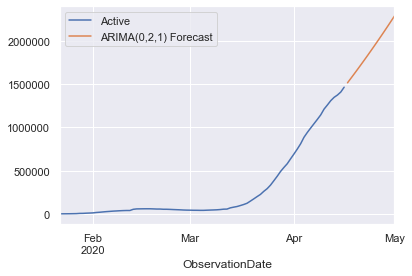

In [152]:
model = ARIMA(datewise['Active'],order=(0,2,1))
results = model.fit()
fcast = results.predict(len(datewise),len(datewise)+14,typ='levels').rename('ARIMA(0,2,1) Forecast')

datewise['Active'].plot(legend=True)
fcast.plot(legend=True)

In [153]:
fcast

2020-04-17    1.517412e+06
2020-04-18    1.568680e+06
2020-04-19    1.620542e+06
2020-04-20    1.673000e+06
2020-04-21    1.726052e+06
2020-04-22    1.779698e+06
2020-04-23    1.833940e+06
2020-04-24    1.888776e+06
2020-04-25    1.944206e+06
2020-04-26    2.000232e+06
2020-04-27    2.056852e+06
2020-04-28    2.114067e+06
2020-04-29    2.171876e+06
2020-04-30    2.230281e+06
2020-05-01    2.289280e+06
Freq: D, Name: ARIMA(0,2,1) Forecast, dtype: float64

### ARIMA Model Summary:

**Predicted statistics for 2020-05-01:** 

**1. Number of confirmed cases : 3,669,637**

**2. Number of active cases : 2,289,280**

**3. Number of recovered cases : 1,085,120**

**4. Number of deaths          : 284,476**

**5. Root mean squared error : 48159.561**

- - -

## Facebook's Prophet

In [154]:
confirmed = datewise.groupby('ObservationDate').sum()['Confirmed'].reset_index()
confirmed.head()

,ObservationDate,Confirmed
0,2020-01-22,555
1,2020-01-23,653
2,2020-01-24,941
3,2020-01-25,1438
4,2020-01-26,2118


In [155]:
recovered = datewise.groupby('ObservationDate').sum()['Recovered'].reset_index()
recovered.head()

,ObservationDate,Recovered
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52


In [156]:
deaths = datewise.groupby('ObservationDate').sum()['Deaths'].reset_index()
deaths.head()

,ObservationDate,Deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56


In [157]:
active = datewise.groupby('ObservationDate').sum()['Active'].reset_index()
active.head()

,ObservationDate,Active
0,2020-01-22,510
1,2020-01-23,605
2,2020-01-24,879
3,2020-01-25,1357
4,2020-01-26,2010


#### Format the data

In [158]:
confirmed.columns = ['ds','y']
confirmed.head()

,ds,y
0,2020-01-22,555
1,2020-01-23,653
2,2020-01-24,941
3,2020-01-25,1438
4,2020-01-26,2118


In [159]:
recovered.columns = ['ds','y']
recovered.head()

,ds,y
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52


In [160]:
deaths.columns = ['ds','y']
deaths.head()

,ds,y
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56


In [161]:
active.columns = ['ds','y']
active.head()

,ds,y
0,2020-01-22,510
1,2020-01-23,605
2,2020-01-24,879
3,2020-01-25,1357
4,2020-01-26,2010


#### Create and Fit Model

In [162]:
from fbprophet import Prophet

m_c = Prophet()

m_c.fit(confirmed)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [163]:
m_r = Prophet()

m_r.fit(recovered)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [164]:
m_d = Prophet()

m_d.fit(deaths)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [165]:
m_a = Prophet()

m_a.fit(active)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [166]:
future = m_c.make_future_dataframe(periods=15)

In [167]:
future1 = m_r.make_future_dataframe(periods=15)

In [168]:
future2 = m_d.make_future_dataframe(periods=15)

In [169]:
future3 = m_a.make_future_dataframe(periods=15)

In [170]:
future.tail()

,ds
96,2020-04-27
97,2020-04-28
98,2020-04-29
99,2020-04-30
100,2020-05-01


In [171]:
future1.tail()

,ds
96,2020-04-27
97,2020-04-28
98,2020-04-29
99,2020-04-30
100,2020-05-01


In [172]:
future2.tail()

,ds
96,2020-04-27
97,2020-04-28
98,2020-04-29
99,2020-04-30
100,2020-05-01


In [173]:
future3.tail()

,ds
96,2020-04-27
97,2020-04-28
98,2020-04-29
99,2020-04-30
100,2020-05-01


#### Predict and fill in the Future

In [174]:
c_forecast = m_c.predict(future)

In [175]:
r_forecast = m_r.predict(future1)

In [176]:
d_forecast = m_d.predict(future2)

In [177]:
a_forecast = m_a.predict(future3)

In [178]:
c_forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-1812.493091,-12340.581553,1003.067671,-1812.493091,-1812.493091,-4120.714947,-4120.714947,-4120.714947,-4120.714947,-4120.714947,-4120.714947,0.0,0.0,0.0,-5933.208038
1,2020-01-23,-518.663479,-8522.433922,4905.074158,-518.663479,-518.663479,-1606.945393,-1606.945393,-1606.945393,-1606.945393,-1606.945393,-1606.945393,0.0,0.0,0.0,-2125.608873
2,2020-01-24,775.166133,-4169.000207,9278.388558,775.166133,775.166133,1850.968409,1850.968409,1850.968409,1850.968409,1850.968409,1850.968409,0.0,0.0,0.0,2626.134542
3,2020-01-25,2068.995745,-635.108253,13493.527526,2068.995745,2068.995745,4659.502056,4659.502056,4659.502056,4659.502056,4659.502056,4659.502056,0.0,0.0,0.0,6728.497801
4,2020-01-26,3373.600892,-74.415402,13289.873825,3373.600892,3373.600892,3071.489260,3071.489260,3071.489260,3071.489260,3071.489260,3071.489260,0.0,0.0,0.0,6445.090152


In [179]:
c_forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
96,2020-04-27,3.042280e+06,2.974390e+06,3.106290e+06,2.976709e+06,3.106438e+06,-458.058102,-458.058102,-458.058102,-458.058102,-458.058102,-458.058102,0.0,0.0,0.0,3.041822e+06
97,2020-04-28,3.122884e+06,3.043984e+06,3.194321e+06,3.045636e+06,3.195779e+06,-3396.241283,-3396.241283,-3396.241283,-3396.241283,-3396.241283,-3396.241283,0.0,0.0,0.0,3.119488e+06
98,2020-04-29,3.203488e+06,3.111632e+06,3.285209e+06,3.116920e+06,3.286045e+06,-4120.714947,-4120.714947,-4120.714947,-4120.714947,-4120.714947,-4120.714947,0.0,0.0,0.0,3.199367e+06
99,2020-04-30,3.284092e+06,3.179528e+06,3.377168e+06,3.184399e+06,3.376305e+06,-1606.945393,-1606.945393,-1606.945393,-1606.945393,-1606.945393,-1606.945393,0.0,0.0,0.0,3.282485e+06
100,2020-05-01,3.364696e+06,3.253394e+06,3.475605e+06,3.250441e+06,3.470392e+06,1850.968409,1850.968409,1850.968409,1850.968409,1850.968409,1850.968409,0.0,0.0,0.0,3.366547e+06


In [180]:
c_forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [181]:
c_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
96,2020-04-27,3.041822e+06,2.974390e+06,3.106290e+06
97,2020-04-28,3.119488e+06,3.043984e+06,3.194321e+06
98,2020-04-29,3.199367e+06,3.111632e+06,3.285209e+06
99,2020-04-30,3.282485e+06,3.179528e+06,3.377168e+06
100,2020-05-01,3.366547e+06,3.253394e+06,3.475605e+06


In [182]:
r_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
96,2020-04-27,738427.001912,721659.230136,757569.550180
97,2020-04-28,759514.845661,740518.360899,781240.144441
98,2020-04-29,782217.959378,761312.109292,807100.052362
99,2020-04-30,804061.851116,780964.483380,829552.904392
100,2020-05-01,822220.065809,796699.902941,851116.589909


In [183]:
d_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
96,2020-04-27,203999.969495,199817.910491,208147.582537
97,2020-04-28,210039.134942,205006.179128,214937.966764
98,2020-04-29,216233.505447,210753.569834,221754.408797
99,2020-04-30,222638.130537,216275.071443,228862.441682
100,2020-05-01,228389.400231,221645.959909,235276.674899


In [184]:
a_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
96,2020-04-27,2.090733e+06,2.048820e+06,2.132214e+06
97,2020-04-28,2.140889e+06,2.095170e+06,2.188829e+06
98,2020-04-29,2.192231e+06,2.136156e+06,2.245330e+06
99,2020-04-30,2.246695e+06,2.183331e+06,2.307760e+06
100,2020-05-01,2.305761e+06,2.237439e+06,2.373152e+06


#### Plotting Forecast

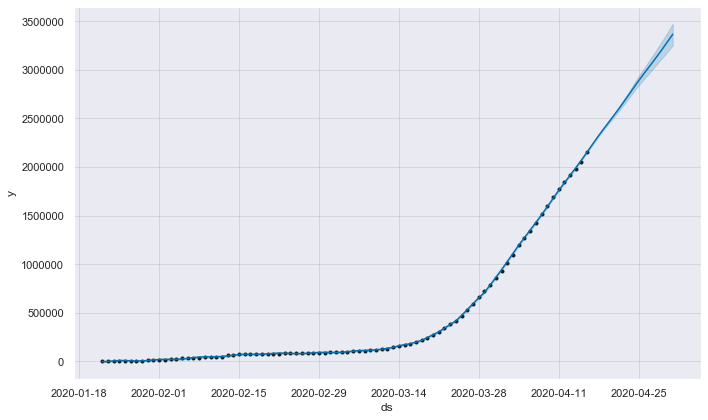

In [185]:
m_c.plot(c_forecast);

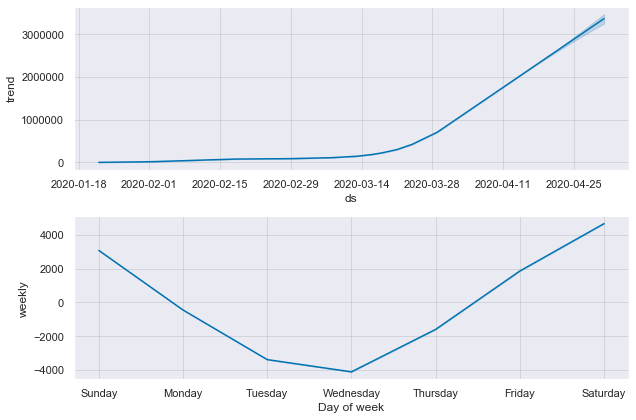

In [186]:
m_c.plot_components(c_forecast);

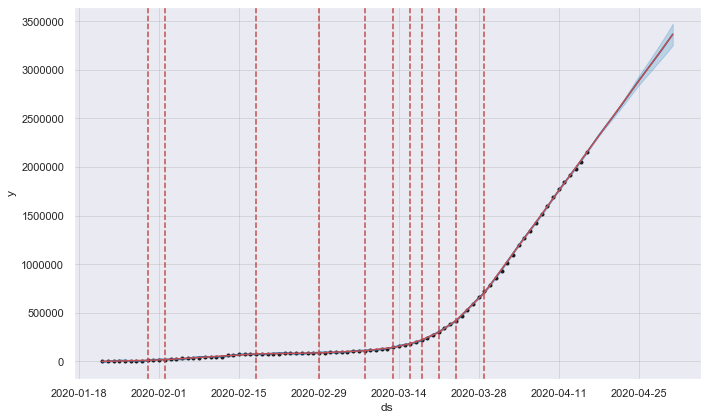

In [187]:
from fbprophet.plot import add_changepoints_to_plot
fig = m_c.plot(c_forecast)
a = add_changepoints_to_plot(fig.gca(), m_c, c_forecast)

In [188]:
train = confirmed.iloc[:77]
test = confirmed.iloc[77:]

In [189]:
m_c = Prophet()
m_c.fit(train)
future = m_c.make_future_dataframe(periods=7)
forecast = m_c.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [190]:
forecast.tail(7)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
77,2020-04-08,1.439371e+06,1.411967e+06,1.455405e+06,1.438953e+06,1.439631e+06,-5248.736462,-5248.736462,-5248.736462,-5248.736462,-5248.736462,-5248.736462,0.0,0.0,0.0,1.434123e+06
78,2020-04-09,1.507339e+06,1.480813e+06,1.526806e+06,1.504701e+06,1.509595e+06,-3544.333588,-3544.333588,-3544.333588,-3544.333588,-3544.333588,-3544.333588,0.0,0.0,0.0,1.503795e+06
79,2020-04-10,1.575307e+06,1.550263e+06,1.596954e+06,1.569342e+06,1.580609e+06,-940.573285,-940.573285,-940.573285,-940.573285,-940.573285,-940.573285,0.0,0.0,0.0,1.574367e+06
80,2020-04-11,1.643275e+06,1.620359e+06,1.671632e+06,1.632176e+06,1.652309e+06,3184.208819,3184.208819,3184.208819,3184.208819,3184.208819,3184.208819,0.0,0.0,0.0,1.646459e+06
81,2020-04-12,1.711243e+06,1.686593e+06,1.742400e+06,1.694690e+06,1.724626e+06,4411.249315,4411.249315,4411.249315,4411.249315,4411.249315,4411.249315,0.0,0.0,0.0,1.715654e+06
82,2020-04-13,1.779211e+06,1.747145e+06,1.809469e+06,1.756968e+06,1.797078e+06,1417.972054,1417.972054,1417.972054,1417.972054,1417.972054,1417.972054,0.0,0.0,0.0,1.780629e+06
83,2020-04-14,1.847179e+06,1.813362e+06,1.878348e+06,1.818516e+06,1.870429e+06,720.213147,720.213147,720.213147,720.213147,720.213147,720.213147,0.0,0.0,0.0,1.847899e+06


In [191]:
test

,ds,y
77,2020-04-08,1511104
78,2020-04-09,1595350
79,2020-04-10,1691719
80,2020-04-11,1771514
81,2020-04-12,1846680
82,2020-04-13,1917320
83,2020-04-14,1976192
84,2020-04-15,2056055
85,2020-04-16,2152647


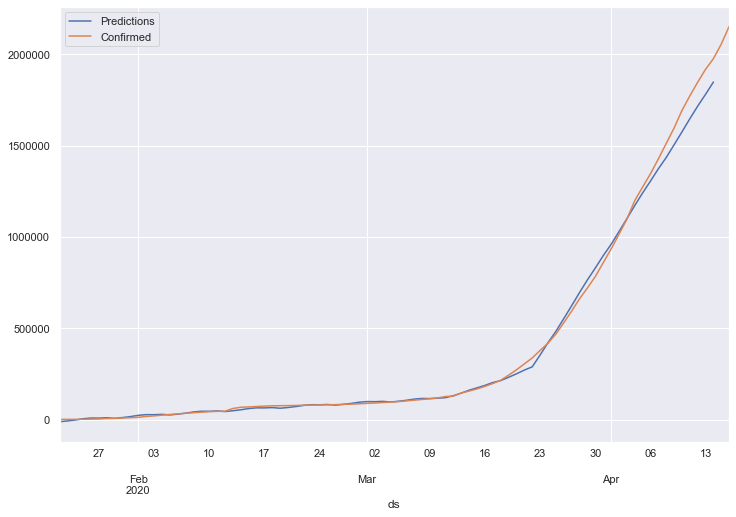

In [192]:
ax = forecast.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,8))
confirmed.plot(x='ds',y='y',label='Confirmed',legend=True,ax=ax)


In [193]:
predictions = forecast['yhat']

In [194]:
predictions

0    -1.217719e+04
1    -7.817954e+03
2    -2.559364e+03
3     4.220248e+03
4     8.102118e+03
          ...     
79    1.574367e+06
80    1.646459e+06
81    1.715654e+06
82    1.780629e+06
83    1.847899e+06
Name: yhat, Length: 84, dtype: float64

In [195]:
test = confirmed['y'][:84]

In [196]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

fb_mae = mean_absolute_error(test,predictions)
fb_mse = mean_squared_error(test,predictions)
fb_rmse = np.sqrt(mean_squared_error(test,predictions))

print("MAE :",fb_mae)
print("MSE :",fb_mse)
print("RMSE :",fb_rmse)

MAE : 19884.873110344928
MSE : 1412471260.697958
RMSE : 37582.85860200044


- - -

### Prophet Model Summary:

**Predicted statistics for 2020-05-01:** 

**1. Number of confirmed cases : 3,366,547**

**2. Number of active cases : 2,305,761**

**3. Number of recovered cases : 822,220**

**4. Number of deaths          : 228,389**

**5. Root mean squared error : 37582.858**

In [197]:
from prettytable import PrettyTable
    
x = PrettyTable()
x.field_names = ["Rank","Model", "RMSE"]
x.add_row([1,"Autoregressive Model", 6684.713])
x.add_row([2,"Holt's Winter Model", 18304.261])
x.add_row([3,"Prophet Model", 37582.858])
x.add_row([4,"ARIMA Model", 48159.561])
print(x)

+------+----------------------+-----------+
| Rank |        Model         |    RMSE   |
+------+----------------------+-----------+
|  1   | Autoregressive Model |  6684.713 |
|  2   | Holt's Winter Model  | 18304.261 |
|  3   |    Prophet Model     | 37582.858 |
|  4   |     ARIMA Model      | 48159.561 |
+------+----------------------+-----------+


In [198]:
x = PrettyTable()
x.field_names = ["S.No","Model", "Confirmed Cases by May 2020"]
x.add_row([1,"Autoregressive Model", 5106370])
x.add_row([2,"Holt's Winter Model", 3371121])
x.add_row([3,"Prophet Model", 3366547])
x.add_row([4,"ARIMA Model", 3669637])
print(x)

+------+----------------------+-----------------------------+
| S.No |        Model         | Confirmed Cases by May 2020 |
+------+----------------------+-----------------------------+
|  1   | Autoregressive Model |           5106370           |
|  2   | Holt's Winter Model  |           3371121           |
|  3   |    Prophet Model     |           3366547           |
|  4   |     ARIMA Model      |           3669637           |
+------+----------------------+-----------------------------+


In [199]:
x = PrettyTable()
x.field_names = ["S.No","Model", "Active Cases by May 2020"]
x.add_row([1,"Autoregressive Model", 3545463])
x.add_row([2,"Holt's Winter Model",  2086781])
x.add_row([3,"Prophet Model", 2305761])
x.add_row([4,"ARIMA Model", 2289280])
print(x)

+------+----------------------+--------------------------+
| S.No |        Model         | Active Cases by May 2020 |
+------+----------------------+--------------------------+
|  1   | Autoregressive Model |         3545463          |
|  2   | Holt's Winter Model  |         2086781          |
|  3   |    Prophet Model     |         2305761          |
|  4   |     ARIMA Model      |         2289280          |
+------+----------------------+--------------------------+


In [200]:
x = PrettyTable()
x.field_names = ["S.No","Model", "Recovered Cases by May 2020"]
x.add_row([1,"Autoregressive Model", 1117456])
x.add_row([2,"Holt's Winter Model", 974482])
x.add_row([3,"Prophet Model", 822220])
x.add_row([4,"ARIMA Model", 1085120])
print(x)

+------+----------------------+-----------------------------+
| S.No |        Model         | Recovered Cases by May 2020 |
+------+----------------------+-----------------------------+
|  1   | Autoregressive Model |           1117456           |
|  2   | Holt's Winter Model  |            974482           |
|  3   |    Prophet Model     |            822220           |
|  4   |     ARIMA Model      |           1085120           |
+------+----------------------+-----------------------------+


In [201]:
x = PrettyTable()
x.field_names = ["S.No","Model", "Deaths by May 2020"]
x.add_row([1,"Autoregressive Model", 600058])
x.add_row([2,"Holt's Winter Model", 262605])
x.add_row([3,"Prophet Model", 228389])
x.add_row([4,"ARIMA Model", 284476])
print(x)

+------+----------------------+--------------------+
| S.No |        Model         | Deaths by May 2020 |
+------+----------------------+--------------------+
|  1   | Autoregressive Model |       600058       |
|  2   | Holt's Winter Model  |       262605       |
|  3   |    Prophet Model     |       228389       |
|  4   |     ARIMA Model      |       284476       |
+------+----------------------+--------------------+
